## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

%matplotlib inline

In [2]:
kc_house_df = pd.read_csv('data/kc_house_data.csv', index_col='id')

In [3]:
kc_house_df.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id                                                                             
7129300520  10/13/2014  221900.0         3       1.00         1180      5650   
6414100192   12/9/2014  538000.0         3       2.25         2570      7242   
5631500400   2/25/2015  180000.0         2       1.00          770     10000   
2487200875   12/9/2014  604000.0         4       3.00         1960      5000   
1954400510   2/18/2015  510000.0         3       2.00         1680      8080   

            floors  waterfront  view  condition  grade  sqft_above  \
id                                                                   
7129300520     1.0         NaN   0.0          3      7        1180   
6414100192     2.0         0.0   0.0          3      7        2170   
5631500400     1.0         0.0   0.0          3      6         770   
2487200875     1.0         0.0   0.0          5      7        1050   
1954400510     1.0         0.0   0.0          3      8        1680   

           sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
id                                                                            
7129300520           0.0      1955           0.0    98178  47.5112 -122.257   
6414100192         400.0      1951        1991.0    98125  47.7210 -122.319   
5631500400           0.0      1933           NaN    98028  47.7379 -122.233   
2487200875         910.0      1965           0.0    98136  47.5208 -122.393   
1954400510           0.0      1987           0.0    98074  47.6168 -122.045   

            sqft_living15  sqft_lot15  
id                                     
7129300520           1340        5650  
6414100192           1690        7639  
5631500400           2720        8062  
2487200875           1360        5000  
1954400510           1800        7503

In [4]:
kc_house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

In [5]:
kc_house_df.price.agg(['min','max','mean'])

min     7.800000e+04
max     7.700000e+06
mean    5.402966e+05
Name: price, dtype: float64

In [6]:
kc_house_df.yr_renovated.value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [7]:
kc_house_df['waterfront'].fillna(0, inplace=True)

In [8]:
kc_house_df['yr_renovated'].fillna(0, inplace=True)
kc_house_df['yr_renovated'].value_counts()

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [9]:
def is_renovated(reno_list):
    new_list = []
    for x in reno_list:
        if x == 0:
            new_list.append(False)
        else:
            new_list.append(True)
    return new_list

In [10]:
kc_house_df['is_renovated'] = is_renovated(kc_house_df['yr_renovated'])

In [11]:
kc_house_df['is_renovated']

id
7129300520    False
6414100192     True
5631500400    False
2487200875    False
1954400510    False
              ...  
263000018     False
6600060120    False
1523300141    False
291310100     False
1523300157    False
Name: is_renovated, Length: 21597, dtype: bool

In [12]:
kc_house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

In [13]:
kc_house_df['view'].fillna(0, inplace=True)

In [14]:
kc_house_df['view'].value_counts()

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [15]:
kc_house_df.date.value_counts()

6/23/2014    142
6/26/2014    131
6/25/2014    131
7/8/2014     127
4/27/2015    126
            ... 
5/17/2014      1
8/30/2014      1
5/15/2015      1
8/3/2014       1
11/2/2014      1
Name: date, Length: 372, dtype: int64

In [16]:
def become_date(date_list):
    new_list=[]
    for x in date_list:
        new_list.append(datetime.strptime(x, '%m/%d/%Y'))
    return new_list

In [17]:
kc_house_df['date'] = become_date(kc_house_df['date'])
kc_house_df.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id                                                                            
7129300520 2014-10-13  221900.0         3       1.00         1180      5650   
6414100192 2014-12-09  538000.0         3       2.25         2570      7242   
5631500400 2015-02-25  180000.0         2       1.00          770     10000   
2487200875 2014-12-09  604000.0         4       3.00         1960      5000   
1954400510 2015-02-18  510000.0         3       2.00         1680      8080   

            floors  waterfront  view  condition  ...  sqft_above  \
id                                               ...               
7129300520     1.0         0.0   0.0          3  ...        1180   
6414100192     2.0         0.0   0.0          3  ...        2170   
5631500400     1.0         0.0   0.0          3  ...         770   
2487200875     1.0         0.0   0.0          5  ...        1050   
1954400510     1.0         0.0   0.0          3  ...        1680   

            sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
id                                                                            
7129300520            0.0     1955           0.0    98178  47.5112 -122.257   
6414100192          400.0     1951        1991.0    98125  47.7210 -122.319   
5631500400            0.0     1933           0.0    98028  47.7379 -122.233   
2487200875          910.0     1965           0.0    98136  47.5208 -122.393   
1954400510            0.0     1987           0.0    98074  47.6168 -122.045   

            sqft_living15  sqft_lot15  is_renovated  
id                                                   
7129300520           1340        5650         False  
6414100192           1690        7639          True  
5631500400           2720        8062         False  
2487200875           1360        5000         False  
1954400510           1800        7503         False  

[5 rows x 21 columns]

In [18]:
kc_house_df.date.sort_values()

id
2202500290   2014-05-02
7853361370   2014-05-02
7197300105   2014-05-02
3438501320   2014-05-02
472000620    2014-05-02
                ...    
8149600265   2015-05-14
4166600610   2015-05-14
7923600250   2015-05-15
5101400871   2015-05-24
9106000005   2015-05-27
Name: date, Length: 21597, dtype: datetime64[ns]

In [19]:
kc_house_df[kc_house_df['sqft_basement']=='?']

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id                                                                             
1321400060 2014-06-27   257500.0         3       2.25         1715      6819   
16000397   2014-12-05   189000.0         2       1.00         1200      9850   
7203220400 2014-07-07   861990.0         5       2.75         3595      5639   
1531000030 2015-03-23   720000.0         4       2.50         3450     39683   
2525310310 2014-09-16   272500.0         3       1.75         1540     12600   
...               ...        ...       ...        ...          ...       ...   
3226049565 2014-07-11   504600.0         5       3.00         2360      5000   
1760650900 2014-07-21   337500.0         4       2.50         2330      4907   
6021503707 2015-01-20   352500.0         2       2.50          980      1010   
2909310100 2014-10-15   332000.0         4       2.50         2380      5737   
191100405  2015-04-21  1580000.0         4       3.25         3410     10125   

            floors  waterfront  view  condition  ...  sqft_above  \
id                                               ...               
1321400060     2.0         0.0   0.0          3  ...        1715   
16000397       1.0         0.0   0.0          4  ...        1200   
7203220400     2.0         0.0   0.0          3  ...        3595   
1531000030     2.0         0.0   0.0          3  ...        3450   
2525310310     1.0         0.0   0.0          4  ...        1160   
...            ...         ...   ...        ...  ...         ...   
3226049565     1.0         0.0   0.0          3  ...        1390   
1760650900     2.0         0.0   0.0          3  ...        2330   
6021503707     3.0         0.0   0.0          3  ...         980   
2909310100     2.0         0.0   0.0          3  ...        2380   
191100405      2.0         0.0   0.0          3  ...        3410   

            sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
id                                                                            
1321400060              ?     1995           0.0    98003  47.3097 -122.327   
16000397                ?     1921           0.0    98002  47.3089 -122.210   
7203220400              ?     2014           0.0    98053  47.6848 -122.016   
1531000030              ?     2002           0.0    98010  47.3420 -122.025   
2525310310              ?     1980           0.0    98038  47.3624 -122.031   
...                   ...      ...           ...      ...      ...      ...   
3226049565              ?     2008           0.0    98103  47.6931 -122.330   
1760650900              ?     2013           0.0    98042  47.3590 -122.081   
6021503707              ?     2008           0.0    98117  47.6844 -122.387   
2909310100              ?     2010           0.0    98023  47.2815 -122.356   
191100405               ?     2007           0.0    98040  47.5653 -122.223   

            sqft_living15  sqft_lot15  is_renovated  
id                                                   
1321400060           2238        6819         False  
16000397             1060        5095         False  
7203220400           3625        5639         False  
1531000030           3350       39750         False  
2525310310           1540       11656         False  
...                   ...         ...           ...  
3226049565           2180        5009         False  
1760650900           2300        3836         False  
6021503707            980        1023         False  
2909310100           2380        5396         False  
191100405            2290       10125         False  

[454 rows x 21 columns]

In [20]:
def trans_int(string_list):
    new_list = []
    for x in string_list:
        if x == '?':
            new_list.append(x)
        else:
            new_list.append(int(float(x)))
    return new_list

In [21]:
kc_house_df['sqft_basement'] = trans_int(kc_house_df['sqft_basement'])
kc_house_df['yr_renovated'] = trans_int(kc_house_df['yr_renovated'])
kc_house_df['waterfront'] = trans_int(kc_house_df['waterfront'])
kc_house_df['view'] = trans_int(kc_house_df['view'])
kc_house_df.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id                                                                            
7129300520 2014-10-13  221900.0         3       1.00         1180      5650   
6414100192 2014-12-09  538000.0         3       2.25         2570      7242   
5631500400 2015-02-25  180000.0         2       1.00          770     10000   
2487200875 2014-12-09  604000.0         4       3.00         1960      5000   
1954400510 2015-02-18  510000.0         3       2.00         1680      8080   

            floors  waterfront  view  condition  ...  sqft_above  \
id                                               ...               
7129300520     1.0           0     0          3  ...        1180   
6414100192     2.0           0     0          3  ...        2170   
5631500400     1.0           0     0          3  ...         770   
2487200875     1.0           0     0          5  ...        1050   
1954400510     1.0           0     0          3  ...        1680   

            sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
id                                                                            
7129300520              0     1955             0    98178  47.5112 -122.257   
6414100192            400     1951          1991    98125  47.7210 -122.319   
5631500400              0     1933             0    98028  47.7379 -122.233   
2487200875            910     1965             0    98136  47.5208 -122.393   
1954400510              0     1987             0    98074  47.6168 -122.045   

            sqft_living15  sqft_lot15  is_renovated  
id                                                   
7129300520           1340        5650         False  
6414100192           1690        7639          True  
5631500400           2720        8062         False  
2487200875           1360        5000         False  
1954400510           1800        7503         False  

[5 rows x 21 columns]

In [22]:
kc_house_df['sqft_basement'].value_counts()

0       12826
?         454
600       217
500       209
700       208
        ...  
666         1
1930        1
1920        1
1913        1
3500        1
Name: sqft_basement, Length: 304, dtype: int64

In [23]:
total = 0
for x in kc_house_df['sqft_basement']:
    if x == '?':
        continue
    else:
        total += x
mean_sqft_basement = round(total/(len(kc_house_df['sqft_basement']) - 454))
mean_sqft_basement

292

In [24]:
kc_house_df['sqft_basement'].replace(to_replace = '?', value = mean_sqft_basement, inplace = True)

In [25]:
kc_house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipco

In [26]:
kc_house_df.corr().price

price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
waterfront       0.264306
view             0.393497
condition        0.036056
grade            0.667951
sqft_above       0.605368
sqft_basement    0.322192
yr_built         0.053953
yr_renovated     0.117855
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
is_renovated     0.117543
Name: price, dtype: float64

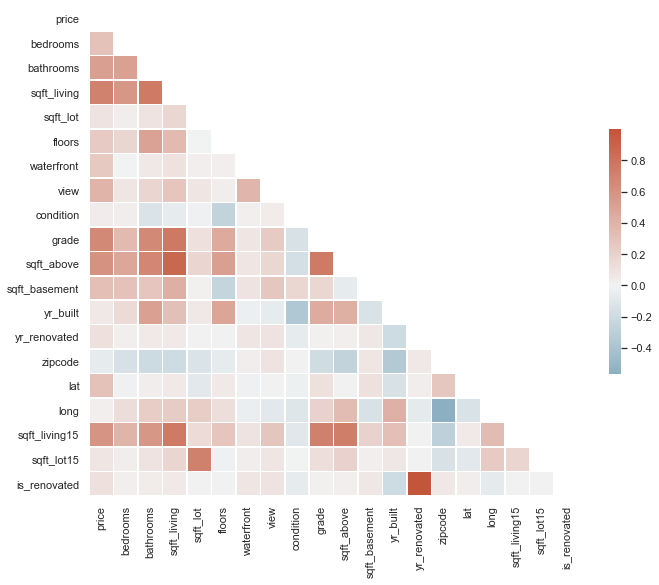

In [27]:
sns.set_theme(style="white")
corr = kc_house_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [28]:
kc_house_df.corr()

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.308787   0.525906     0.701917  0.089876  0.256804   
bedrooms       0.308787  1.000000   0.514508     0.578212  0.032471  0.177944   
bathrooms      0.525906  0.514508   1.000000     0.755758  0.088373  0.502582   
sqft_living    0.701917  0.578212   0.755758     1.000000  0.173453  0.353953   
sqft_lot       0.089876  0.032471   0.088373     0.173453  1.000000 -0.004814   
floors         0.256804  0.177944   0.502582     0.353953 -0.004814  1.000000   
waterfront     0.264306 -0.002127   0.063629     0.104637  0.021459  0.020797   
view           0.393497  0.078354   0.186016     0.281715  0.075054  0.028414   
condition      0.036056  0.026496  -0.126479    -0.059445 -0.008830 -0.264075   
grade          0.667951  0.356563   0.665838     0.762779  0.114731  0.458794   
sqft_above     0.605368  0.479386   0.686668     0.876448  0.184139  0.523989   
sqft_basement  0.322192  0.299037   0.279541     0.430190  0.015293 -0.242358   
yr_built       0.053953  0.155670   0.507173     0.318152  0.052946  0.489193   
yr_renovated   0.117855  0.017900   0.047177     0.051060  0.004979  0.003793   
zipcode       -0.053402 -0.154092  -0.204786    -0.199802 -0.129586 -0.059541   
lat            0.306692 -0.009951   0.024280     0.052155 -0.085514  0.049239   
long           0.022036  0.132054   0.224903     0.241214  0.230227  0.125943   
sqft_living15  0.585241  0.393406   0.569884     0.756402  0.144763  0.280102   
sqft_lot15     0.082845  0.030690   0.088303     0.184342  0.718204 -0.010722   
is_renovated   0.117543  0.017635   0.046742     0.050829  0.005091  0.003713   

               waterfront      view  condition     grade  sqft_above  \
price            0.264306  0.393497   0.036056  0.667951    0.605368   
bedrooms        -0.002127  0.078354   0.026496  0.356563    0.479386   
bathrooms        0.063629  0.186016  -0.126479  0.665838    0.686668   
sqft_living      0.104637  0.281715  -0.059445  0.762779    0.876448   
sqft_lot         0.021459  0.075054  -0.008830  0.114731    0.184139   
floors           0.020797  0.028414  -0.264075  0.458794    0.523989   
waterfront       1.000000  0.380543   0.016648  0.082818    0.071778   
view             0.380543  1.000000   0.045622  0.249082    0.166017   
condition        0.016648  0.045622   1.000000 -0.146896   -0.158904   
grade            0.082818  0.249082  -0.146896  1.000000    0.756073   
sqft_above       0.071778  0.166017  -0.158904  0.756073    1.000000   
sqft_basement    0.083780  0.272313   0.169153  0.166397   -0.051781   
yr_built        -0.024487 -0.054452  -0.361592  0.447865    0.424037   
yr_renovated     0.073939  0.090339  -0.055808  0.015623    0.020645   
zipcode          0.028923  0.085059   0.002888 -0.185771   -0.261570   
lat             -0.012157  0.006321  -0.015102  0.113575   -0.001199   
long            -0.037628 -0.077702  -0.105877  0.200341    0.344842   
sqft_living15    0.083823  0.278928  -0.093072  0.713867    0.731767   
sqft_lot15       0.030658  0.073083  -0.003126  0.120981    0.195077   
is_renovated     0.074267  0.090480  -0.055383  0.015259    0.020566   

               sqft_basement  yr_built  yr_renovated   zipcode       lat  \
price               0.322192  0.053953      0.117855 -0.053402  0.306692   
bedrooms            0.299037  0.155670      0.017900 -0.154092 -0.009951   
bathrooms           0.279541  0.507173      0.047177 -0.204786  0.024280   
sqft_living         0.430190  0.318152      0.051060 -0.199802  0.052155   
sqft_lot            0.015293  0.052946      0.004979 -0.129586 -0.085514   
floors             -0.242358  0.489193      0.003793 -0.059541  0.049239   
waterfront          0.083780 -0.024487      0.073939  0.028923 -0.012157   
view                0.272313 -0.054452      0.090339  0.085059  0.006321   
condition           0.169153 -0.361592     -0.055808  0.002888 -0.015102   
grade               0.166397  0.447865     

In [29]:
kc_house_df_new = kc_house_df

In [30]:
kc_house_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipco

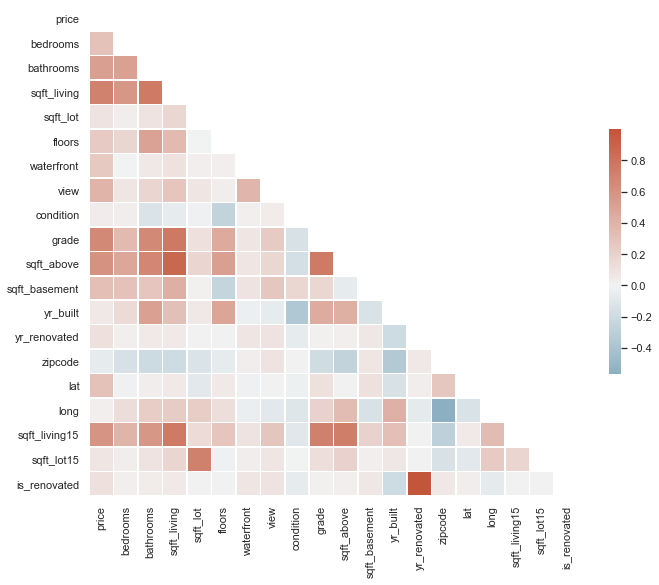

In [31]:
sns.set_theme(style="white")
corr = kc_house_df_new.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [32]:
#kc_house_df_new.to_csv('kc_house_df_new.csv', index=False)

In [33]:
kc_house_df_new.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id                                                                            
7129300520 2014-10-13  221900.0         3       1.00         1180      5650   
6414100192 2014-12-09  538000.0         3       2.25         2570      7242   
5631500400 2015-02-25  180000.0         2       1.00          770     10000   
2487200875 2014-12-09  604000.0         4       3.00         1960      5000   
1954400510 2015-02-18  510000.0         3       2.00         1680      8080   

            floors  waterfront  view  condition  ...  sqft_above  \
id                                               ...               
7129300520     1.0           0     0          3  ...        1180   
6414100192     2.0           0     0          3  ...        2170   
5631500400     1.0           0     0          3  ...         770   
2487200875     1.0           0     0          5  ...        1050   
1954400510     1.0           0     0          3  ...        1680   

            sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
id                                                                             
7129300520              0      1955             0    98178  47.5112 -122.257   
6414100192            400      1951          1991    98125  47.7210 -122.319   
5631500400              0      1933             0    98028  47.7379 -122.233   
2487200875            910      1965             0    98136  47.5208 -122.393   
1954400510              0      1987             0    98074  47.6168 -122.045   

            sqft_living15  sqft_lot15  is_renovated  
id                                                   
7129300520           1340        5650         False  
6414100192           1690        7639          True  
5631500400           2720        8062         False  
2487200875           1360        5000         False  
1954400510           1800        7503         False  

[5 rows x 21 columns]

In [34]:
#kc_house_df_new.drop(['sqft_living15', 'sqft_basement'], axis=1, inplace=True)

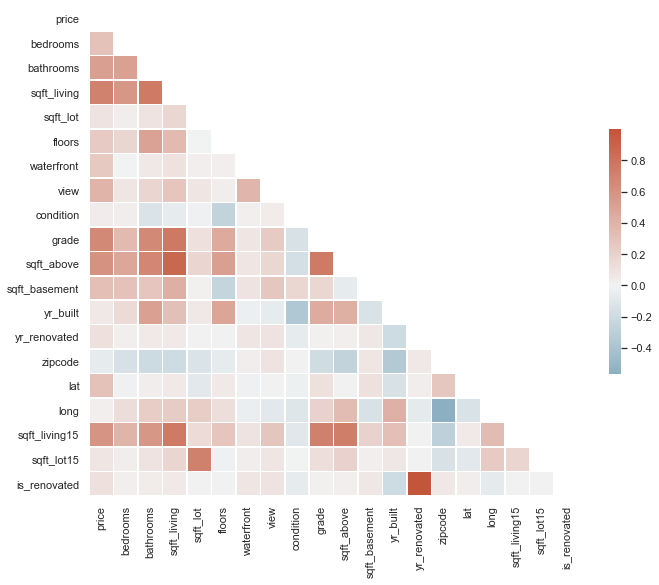

In [35]:
sns.set_theme(style="white")
corr = kc_house_df_new.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [36]:
kc_house_price_corr = kc_house_df_new.corr()['price'].map(abs).sort_values(ascending=False)
kc_house_price_corr

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.393497
sqft_basement    0.322192
bedrooms         0.308787
lat              0.306692
waterfront       0.264306
floors           0.256804
yr_renovated     0.117855
is_renovated     0.117543
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
zipcode          0.053402
condition        0.036056
long             0.022036
Name: price, dtype: float64

In [37]:
kc_house_df_new.waterfront.value_counts()

0    21451
1      146
Name: waterfront, dtype: int64

In [38]:
kc_house_df_new['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

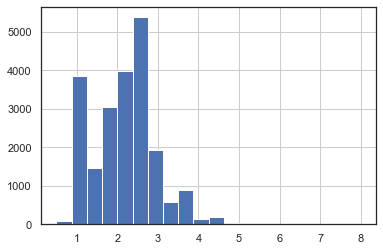

In [39]:
kc_house_df_new.bathrooms.hist(bins=20);

In [40]:
kc_house_df_new[kc_house_df_new['bedrooms'] == 33]

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id                                                                            
2402100895 2014-06-25  640000.0        33       1.75         1620      6000   

            floors  waterfront  view  condition  ...  sqft_above  \
id                                               ...               
2402100895     1.0           0     0          5  ...        1040   

            sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
id                                                                             
2402100895            580      1947             0    98103  47.6878 -122.331   

            sqft_living15  sqft_lot15  is_renovated  
id                                                   
2402100895           1330        4700         False  

[1 rows x 21 columns]

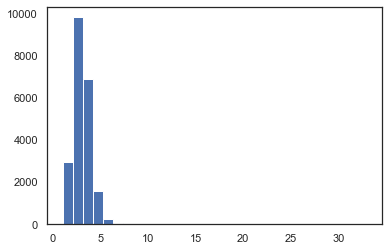

In [41]:
fig, ax = plt.subplots()

ax.hist(kc_house_df_new['bedrooms'], bins=30);

In [42]:
kc_house_df_new[kc_house_df_new['bedrooms'] == 33]

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id                                                                            
2402100895 2014-06-25  640000.0        33       1.75         1620      6000   

            floors  waterfront  view  condition  ...  sqft_above  \
id                                               ...               
2402100895     1.0           0     0          5  ...        1040   

            sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
id                                                                             
2402100895            580      1947             0    98103  47.6878 -122.331   

            sqft_living15  sqft_lot15  is_renovated  
id                                                   
2402100895           1330        4700         False  

[1 rows x 21 columns]

In [43]:
kc_house_df_new.loc[2402100895,'bedrooms'] = 3

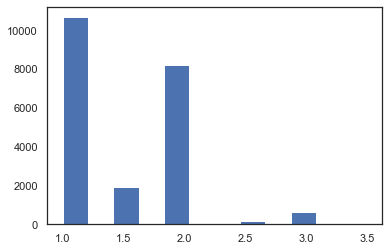

In [44]:
fig, ax = plt.subplots()

ax.hist(kc_house_df_new['floors'], bins=12);

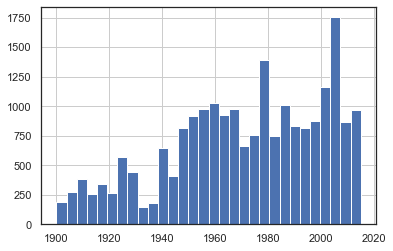

In [45]:
kc_house_df_new['yr_built'].hist(bins=30);

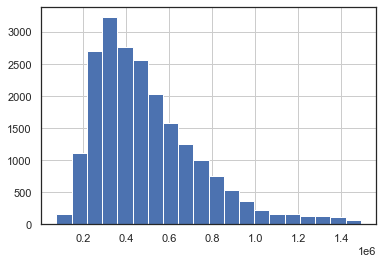

In [46]:
kc_house_df_new[kc_house_df_new['price'] < 1500000].price.hist(bins = 20);

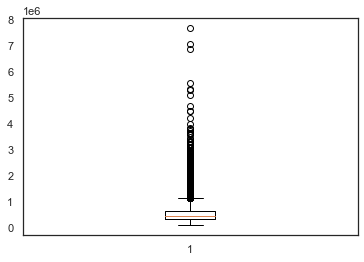

In [47]:
fig, ax = plt.subplots()
ax.boxplot(kc_house_df_new.price, showfliers=True);

In [48]:
kc_house_df_new['sqft_basement'] =  kc_house_df_new['sqft_living'] -  kc_house_df_new['sqft_above']

In [49]:
kc_house_df_new.head(20)

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id                                                                             
7129300520 2014-10-13   221900.0         3       1.00         1180      5650   
6414100192 2014-12-09   538000.0         3       2.25         2570      7242   
5631500400 2015-02-25   180000.0         2       1.00          770     10000   
2487200875 2014-12-09   604000.0         4       3.00         1960      5000   
1954400510 2015-02-18   510000.0         3       2.00         1680      8080   
7237550310 2014-05-12  1230000.0         4       4.50         5420    101930   
1321400060 2014-06-27   257500.0         3       2.25         1715      6819   
2008000270 2015-01-15   291850.0         3       1.50         1060      9711   
2414600126 2015-04-15   229500.0         3       1.00         1780      7470   
3793500160 2015-03-12   323000.0         3       2.50         1890      6560   
1736800520 2015-04-03   662500.0         3       2.50         3560      9796   
9212900260 2014-05-27   468000.0         2       1.00         1160      6000   
114101516  2014-05-28   310000.0         3       1.00         1430     19901   
6054650070 2014-10-07   400000.0         3       1.75         1370      9680   
1175000570 2015-03-12   530000.0         5       2.00         1810      4850   
9297300055 2015-01-24   650000.0         4       3.00         2950      5000   
1875500060 2014-07-31   395000.0         3       2.00         1890     14040   
6865200140 2014-05-29   485000.0         4       1.00         1600      4300   
16000397   2014-12-05   189000.0         2       1.00         1200      9850   
7983200060 2015-04-24   230000.0         3       1.00         1250      9774   

            floors  waterfront  view  condition  ...  sqft_above  \
id                                               ...               
7129300520     1.0           0     0          3  ...        1180   
6414100192     2.0           0     0          3  ...        2170   
5631500400     1.0           0     0          3  ...         770   
2487200875     1.0           0     0          5  ...        1050   
1954400510     1.0           0     0          3  ...        1680   
7237550310     1.0           0     0          3  ...        3890   
1321400060     2.0           0     0          3  ...        1715   
2008000270     1.0           0     0          3  ...        1060   
2414600126     1.0           0     0          3  ...        1050   
3793500160     2.0           0     0          3  ...        1890   
1736800520     1.0           0     0          3  ...        1860   
9212900260     1.0           0     0          4  ...         860   
114101516      1.5           0     0          4  ...        1430   
6054650070     1.0           0     0          4  ...        1370   
1175000570     1.5           0     0          3  ...        1810   
9297300055     2.0           0     3          3  ...        1980   
1875500060     2.0           0     0          3  ...        1890   
6865200140     1.5           0     0          4  ...        1600   
16000397       1.0           0     0          4  ...        1200   
7983200060     1.0           0     0          4  ...        1250   

            sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
id                                                                             
7129300520              0      1955             0    98178  47.5112 -122.257   
6414100192            400      1951          1991    98125  47.7210 -122.319   
5631500400              0      1933             0    98028  47.7379 -122.233   
2487200875            910      1965             0    98136  47.5208 -122.393   
1954400510              0      1987             0    98074  47.6168 -122.045   
7237550310           1530      2001             0    98053  47.6561 -122.005   
1321400060              0      1995             0    98003  47.3097 -122.327   
2008000270              0      1963    

In [50]:
def has_basement(basement_list):
    new_list = []
    for x in basement_list:
        if x == 0:
            new_list.append(False)
        else:
            new_list.append(True)
    return new_list

In [51]:
kc_house_df_new['has_basement'] = has_basement(kc_house_df_new['sqft_basement'])

In [52]:
kc_house_df_new.head(10)

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id                                                                             
7129300520 2014-10-13   221900.0         3       1.00         1180      5650   
6414100192 2014-12-09   538000.0         3       2.25         2570      7242   
5631500400 2015-02-25   180000.0         2       1.00          770     10000   
2487200875 2014-12-09   604000.0         4       3.00         1960      5000   
1954400510 2015-02-18   510000.0         3       2.00         1680      8080   
7237550310 2014-05-12  1230000.0         4       4.50         5420    101930   
1321400060 2014-06-27   257500.0         3       2.25         1715      6819   
2008000270 2015-01-15   291850.0         3       1.50         1060      9711   
2414600126 2015-04-15   229500.0         3       1.00         1780      7470   
3793500160 2015-03-12   323000.0         3       2.50         1890      6560   

            floors  waterfront  view  condition  ...  sqft_basement  yr_built  \
id                                               ...                            
7129300520     1.0           0     0          3  ...              0      1955   
6414100192     2.0           0     0          3  ...            400      1951   
5631500400     1.0           0     0          3  ...              0      1933   
2487200875     1.0           0     0          5  ...            910      1965   
1954400510     1.0           0     0          3  ...              0      1987   
7237550310     1.0           0     0          3  ...           1530      2001   
1321400060     2.0           0     0          3  ...              0      1995   
2008000270     1.0           0     0          3  ...              0      1963   
2414600126     1.0           0     0          3  ...            730      1960   
3793500160     2.0           0     0          3  ...              0      2003   

            yr_renovated  zipcode      lat     long  sqft_living15  \
id                                                                   
7129300520             0    98178  47.5112 -122.257           1340   
6414100192          1991    98125  47.7210 -122.319           1690   
5631500400             0    98028  47.7379 -122.233           2720   
2487200875             0    98136  47.5208 -122.393           1360   
1954400510             0    98074  47.6168 -122.045           1800   
7237550310             0    98053  47.6561 -122.005           4760   
1321400060             0    98003  47.3097 -122.327           2238   
2008000270             0    98198  47.4095 -122.315           1650   
2414600126             0    98146  47.5123 -122.337           1780   
3793500160             0    98038  47.3684 -122.031           2390   

            sqft_lot15  is_renovated  has_basement  
id                                                  
7129300520        5650         False         False  
6414100192        7639          True          True  
5631500400        8062         False         False  
2487200875        5000         False          True  
1954400510        7503         False         False  
7237550310      101930         False          True  
1321400060        6819         False         False  
2008000270        9711         False         False  
2414600126        8113         False          True  
3793500160        7570         False         False  

[10 rows x 22 columns]

In [53]:
kc_house_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipco

In [54]:
kc_no_outliers_df = kc_house_df_new[kc_house_df_new['price'] < 1000000]
kc_no_outliers_df = kc_no_outliers_df[kc_no_outliers_df['sqft_lot'] < 15000]
kc_no_outliers_df = kc_no_outliers_df[kc_no_outliers_df['sqft_living'] < 3650]

kc_no_outliers_df = kc_no_outliers_df.drop(['lat','long'], axis=1)



In [55]:
kc_no_outliers_df['waterfront'].value_counts()

0    17040
1       19
Name: waterfront, dtype: int64

In [56]:
kc_no_outliers_df = kc_no_outliers_df.drop(['waterfront'], axis = 1)

In [57]:
kc_no_outliers_df.corr()

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.258223   0.379382     0.551332 -0.055992  0.242056   
bedrooms       0.258223  1.000000   0.480938     0.621564  0.211941  0.140971   
bathrooms      0.379382  0.480938   1.000000     0.690338 -0.053886  0.512664   
sqft_living    0.551332  0.621564   0.690338     1.000000  0.201649  0.325017   
sqft_lot      -0.055992  0.211941  -0.053886     0.201649  1.000000 -0.397571   
floors         0.242056  0.140971   0.512664     0.325017 -0.397571  1.000000   
view           0.215884  0.022927   0.061429     0.130777  0.043522 -0.023487   
condition      0.055299  0.020410  -0.144766    -0.067254  0.144495 -0.286873   
grade          0.568388  0.302254   0.581830     0.650422  0.016814  0.466688   
sqft_above     0.437670  0.482361   0.606383     0.827311  0.150324  0.533535   
sqft_basement  0.225338  0.272467   0.184942     0.352970  0.098663 -0.326069   
yr_built      -0.007137  0.159185   0.556629     0.340982 -0.065647  0.525140   
yr_renovated   0.090158  0.005498   0.021003     0.023500 -0.015722 -0.003324   
zipcode        0.011993 -0.165928  -0.223021    -0.209432 -0.257600 -0.073221   
sqft_living15  0.491262  0.383136   0.504095     0.721664  0.241428  0.256971   
sqft_lot15    -0.061177  0.137517  -0.048905     0.136559  0.718559 -0.308585   
is_renovated   0.089746  0.005207   0.020519     0.023289 -0.015589 -0.003358   
has_basement   0.181848  0.139129   0.126961     0.180412 -0.027308 -0.288199   

                   view  condition     grade  sqft_above  sqft_basement  \
price          0.215884   0.055299  0.568388    0.437670       0.225338   
bedrooms       0.022927   0.020410  0.302254    0.482361       0.272467   
bathrooms      0.061429  -0.144766  0.581830    0.606383       0.184942   
sqft_living    0.130777  -0.067254  0.650422    0.827311       0.352970   
sqft_lot       0.043522   0.144495  0.016814    0.150324       0.098663   
floors        -0.023487  -0.286873  0.466688    0.533535      -0.326069   
view           1.000000   0.028484  0.101426    0.029235       0.177673   
condition      0.028484   1.000000 -0.178119   -0.186980       0.195019   
grade          0.101426  -0.178119  1.000000    0.659188       0.027899   
sqft_above     0.029235  -0.186980  0.659188    1.000000      -0.233572   
sqft_basement  0.177673   0.195019  0.027899   -0.233572       1.000000   
yr_built      -0.081232  -0.358598  0.494009    0.466533      -0.186836   
yr_renovated   0.051747  -0.055142 -0.010876   -0.004571       0.048291   
zipcode        0.124145  -0.002399 -0.189935   -0.291212       0.122527   
sqft_living15  0.165818  -0.121615  0.627845    0.699360       0.084304   
sqft_lot15     0.054711   0.109587  0.012237    0.101579       0.067184   
is_renovated   0.051868  -0.054739 -0.011275   -0.004608       0.047986   
has_basement   0.140079   0.131863 -0.000452   -0.319916       0.845127   

               yr_built  yr_renovated   zipcode  sqft_living15  sqft_lot15  \
price         -0.007137      0.090158  0.011993       0.491262   -0.061177   
bedrooms       0.159185      0.005498 -0.165928       0.383136    0.137517   
bathrooms      0.556629      0.021003 -0.223021       0.504095   -0.048905   
sqft_living    0.340982      0.023500 -0.209432       0.721664    0.136559   
sqft_lot      -0.065647     -0.015722 -0.257600       0.241428    0.718559   
floors         0.525140     -0.003324 -0.073221       0.256971   -0.308585   
view          -0.081232      0.051747  0.124145       0.165818    0.054711   
condition     -0.358598     -0.055142 -0.002399      -0.121615    0.109587   
grade          0.494009     -0.010876 -0.189935       0.627845    0.012237   
sqft_above     0.466533     -0.004571 -0.291212       0.699360    0.101579   
sqft_basement -0.186836      0.048291  0.122527       0.084304    0.067184   
yr_built       1.000000     -0.193562 -0.350619       0.356025   -0.036874   
yr_renovated  -0.193562      1.000000 

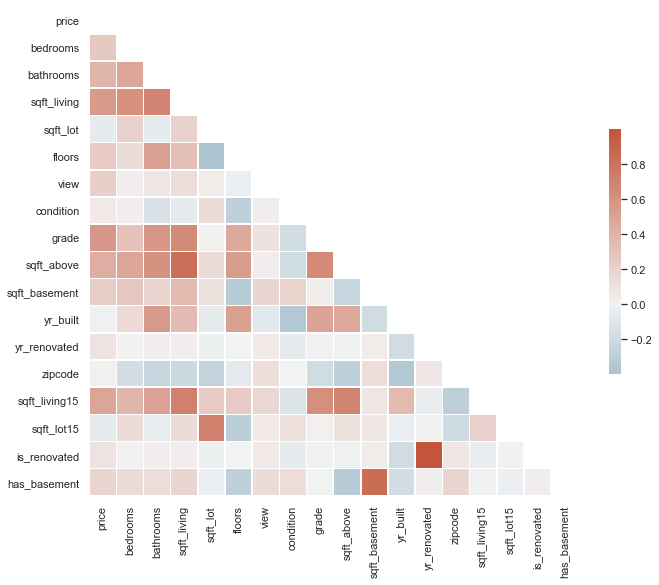

In [58]:
sns.set_theme(style="white")
corr = kc_no_outliers_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [59]:
kc_no_outliers_df['outdoor_space'] = kc_no_outliers_df['sqft_lot'] - kc_no_outliers_df['sqft_living']

In [60]:
kc_no_outliers_df

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id                                                                            
7129300520 2014-10-13  221900.0         3       1.00         1180      5650   
6414100192 2014-12-09  538000.0         3       2.25         2570      7242   
5631500400 2015-02-25  180000.0         2       1.00          770     10000   
2487200875 2014-12-09  604000.0         4       3.00         1960      5000   
1954400510 2015-02-18  510000.0         3       2.00         1680      8080   
...               ...       ...       ...        ...          ...       ...   
263000018  2014-05-21  360000.0         3       2.50         1530      1131   
6600060120 2015-02-23  400000.0         4       2.50         2310      5813   
1523300141 2014-06-23  402101.0         2       0.75         1020      1350   
291310100  2015-01-16  400000.0         3       2.50         1600      2388   
1523300157 2014-10-15  325000.0         2       0.75         1020      1076   

            floors  view  condition  grade  sqft_above  sqft_basement  \
id                                                                      
7129300520     1.0     0          3      7        1180              0   
6414100192     2.0     0          3      7        2170            400   
5631500400     1.0     0          3      6         770              0   
2487200875     1.0     0          5      7        1050            910   
1954400510     1.0     0          3      8        1680              0   
...            ...   ...        ...    ...         ...            ...   
263000018      3.0     0          3      8        1530              0   
6600060120     2.0     0          3      8        2310              0   
1523300141     2.0     0          3      7        1020              0   
291310100      2.0     0          3      8        1600              0   
1523300157     2.0     0          3      7        1020              0   

            yr_built  yr_renovated  zipcode  sqft_living15  sqft_lot15  \
id                                                                       
7129300520      1955             0    98178           1340        5650   
6414100192      1951          1991    98125           1690        7639   
5631500400      1933             0    98028           2720        8062   
2487200875      1965             0    98136           1360        5000   
1954400510      1987             0    98074           1800        7503   
...              ...           ...      ...            ...         ...   
263000018       2009             0    98103           1530        1509   
6600060120      2014             0    98146           1830        7200   
1523300141      2009             0    98144           1020        2007   
291310100       2004             0    98027           1410        1287   
1523300157      2008             0    98144           1020        1357   

            is_renovated  has_basement  outdoor_space  
id                                                     
7129300520         False         False           4470  
6414100192          True          True           4672  
5631500400         False         False           9230  
2487200875         False          True           3040  
1954400510         False         False           6400  
...                  ...           ...            ...  
263000018          False         False           -399  
6600060120         False         False           3503  
1523300141         False         False            330  
291310100          False         False            788  
1523300157         False         False             56  

[17059 rows x 20 columns]

In [61]:
kc_no_outliers_df['is_renovated'].value_counts()

False    16569
True       490
Name: is_renovated, dtype: int64

In [62]:
kc_renovated = kc_no_outliers_df[kc_no_outliers_df['is_renovated']==True]
kc_renovated.describe()

price    bedrooms   bathrooms  sqft_living      sqft_lot  \
count     490.000000  490.000000  490.000000   490.000000    490.000000   
mean   549589.387755    3.304082    2.071939  1933.781633   6573.906122   
std    220706.795666    1.018933    0.751993   670.074198   2886.321769   
min    110000.000000    1.000000    0.750000   520.000000   1024.000000   
25%    375000.000000    3.000000    1.750000  1380.000000   4400.000000   
50%    520000.000000    3.000000    2.000000  1870.000000   6120.000000   
75%    736625.000000    4.000000    2.500000  2410.000000   8357.500000   
max    998000.000000   11.000000    4.500000  3620.000000  14986.000000   

           floors        view   condition       grade   sqft_above  \
count  490.000000  490.000000  490.000000  490.000000   490.000000   
mean     1.458163    0.300000    3.202041    7.346939  1580.679592   
std      0.484720    0.847105    0.497433    0.861611   564.329602   
min      1.000000    0.000000    1.000000    4.000000   520.000000   
25%      1.000000    0.000000    3.000000    7.000000  1150.000000   
50%      1.500000    0.000000    3.000000    7.000000  1520.000000   
75%      2.000000    0.000000    3.000000    8.000000  1920.000000   
max      3.000000    4.000000    5.000000   10.000000  3620.000000   

       sqft_basement     yr_built  yr_renovated       zipcode  sqft_living15  \
count     490.000000   490.000000    490.000000    490.000000     490.000000   
mean      353.102041  1935.806122   1995.587755  98104.042857    1690.887755   
std       436.770273    21.513803     16.756815     50.700938     470.782238   
min         0.000000  1900.000000   1934.000000  98001.000000     828.000000   
25%         0.000000  1918.000000   1986.000000  98070.500000    1350.000000   
50%         0.000000  1936.000000   2000.000000  98116.000000    1634.500000   
75%       730.000000  1952.000000   2009.000000  98133.000000    1950.000000   
max      1730.000000  2003.000000   2015.000000  98199.000000    3640.000000   

         sqft_lot15  outdoor_space  
count    490.000000     490.000000  
mean    6968.385714    4640.124490  
std     5022.336943    2867.687508  
min     1281.000000    -490.000000  
25%     4656.500000    2355.250000  
50%     6063.500000    4165.000000  
75%     8296.500000    6380.000000  
max    70973.000000   13233.000000

In [63]:
kc_renovated.corr()

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.249573   0.527393     0.575656 -0.140114  0.333901   
bedrooms       0.249573  1.000000   0.551877     0.589009  0.095176  0.294944   
bathrooms      0.527393  0.551877   1.000000     0.722564 -0.025152  0.459201   
sqft_living    0.575656  0.589009   0.722564     1.000000  0.143797  0.460333   
sqft_lot      -0.140114  0.095176  -0.025152     0.143797  1.000000 -0.138380   
floors         0.333901  0.294944   0.459201     0.460333 -0.138380  1.000000   
view           0.271737  0.017295   0.171508     0.229018 -0.015809  0.150159   
condition     -0.064625 -0.024628  -0.070370    -0.001321  0.132213  0.030888   
grade          0.682633  0.268588   0.530308     0.542504 -0.048650  0.404514   
sqft_above     0.404537  0.455594   0.573270     0.762542  0.216609  0.656871   
sqft_basement  0.360465  0.314982   0.367833     0.548914 -0.059263 -0.142489   
yr_built      -0.078739  0.060907   0.065614     0.028132  0.410036 -0.127462   
yr_renovated   0.244717  0.171684   0.302672     0.143169 -0.098195  0.026323   
zipcode        0.106576  0.027773   0.088822     0.096477 -0.303955  0.109080   
sqft_living15  0.464890  0.121715   0.311817     0.393528  0.236593  0.171928   
sqft_lot15    -0.106175 -0.019286  -0.047179     0.027931  0.528942 -0.046606   
is_renovated        NaN       NaN        NaN          NaN       NaN       NaN   
has_basement   0.359003  0.297429   0.361857     0.467124 -0.160836 -0.042286   
outdoor_space -0.275535 -0.041835  -0.194152    -0.088932  0.972898 -0.246842   

                   view  condition     grade  sqft_above  sqft_basement  \
price          0.271737  -0.064625  0.682633    0.404537       0.360465   
bedrooms       0.017295  -0.024628  0.268588    0.455594       0.314982   
bathrooms      0.171508  -0.070370  0.530308    0.573270       0.367833   
sqft_living    0.229018  -0.001321  0.542504    0.762542       0.548914   
sqft_lot      -0.015809   0.132213 -0.048650    0.216609      -0.059263   
floors         0.150159   0.030888  0.404514    0.656871      -0.142489   
view           1.000000   0.020868  0.243760    0.205823       0.085416   
condition      0.020868   1.000000 -0.044598    0.010066      -0.015033   
grade          0.243760  -0.044598  1.000000    0.471374       0.223247   
sqft_above     0.205823   0.010066  0.471374    1.000000      -0.122193   
sqft_basement  0.085416  -0.015033  0.223247   -0.122193       1.000000   
yr_built      -0.023172  -0.072960  0.095424    0.103327      -0.090344   
yr_renovated  -0.054227  -0.366336  0.294908    0.028032       0.183425   
zipcode        0.163255  -0.088808  0.093987    0.020488       0.121540   
sqft_living15  0.333101   0.045689  0.442206    0.295034       0.222534   
sqft_lot15     0.096988   0.115321 -0.028657    0.102960      -0.090178   
is_renovated        NaN        NaN       NaN         NaN            NaN   
has_basement   0.096243  -0.023582  0.215135   -0.119526       0.871075   
outdoor_space -0.069425   0.133381 -0.175729    0.039838      -0.187909   

               yr_built  yr_renovated   zipcode  sqft_living15  sqft_lot15  \
price         -0.078739      0.244717  0.106576       0.464890   -0.106175   
bedrooms       0.060907      0.171684  0.027773       0.121715   -0.019286   
bathrooms      0.065614      0.302672  0.088822       0.311817   -0.047179   
sqft_living    0.028132      0.143169  0.096477       0.393528    0.027931   
sqft_lot       0.410036     -0.098195 -0.303955       0.236593    0.528942   
floors        -0.127462      0.026323  0.109080       0.171928   -0.046606   
view          -0.023172     -0.054227  0.163255       0.333101    0.096988   
condition     -0.072960     -0.366336 -0.088808       0.045689    0.115321   
grade          0.095424      0.294908  0.093987       0.442206   -0.028657   
sqft_above     0.103327      0.028032  0.020488       0.295034    0.102960   
sqft_basement -0.090344      0.183425 

In [64]:
kc_not_renovated = kc_no_outliers_df[kc_no_outliers_df['is_renovated']==False]
kc_not_renovated.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count   16569.000000  16569.000000  16569.000000  16569.000000  16569.000000   
mean   448809.540890      3.277084      1.988865   1842.906512   6858.308226   
std    185723.780372      0.861165      0.673776    651.067929   3051.693161   
min     80000.000000      1.000000      0.500000    370.000000    520.000000   
25%    304000.000000      3.000000      1.500000   1350.000000   4748.000000   
50%    416000.000000      3.000000      2.000000   1760.000000   7000.000000   
75%    565000.000000      4.000000      2.500000   2270.000000   8875.000000   
max    999999.000000     10.000000      5.250000   3640.000000  14992.000000   

             floors          view     condition         grade    sqft_above  \
count  16569.000000  16569.000000  16569.000000  16569.000000  16569.000000   
mean       1.469099      0.128070      3.414811      7.409017   1597.980144   
std        0.545668      0.541841      0.652226      0.921309    628.945796   
min        1.000000      0.000000      1.000000      3.000000    370.000000   
25%        1.000000      0.000000      3.000000      7.000000   1140.000000   
50%        1.000000      0.000000      3.000000      7.000000   1440.000000   
75%        2.000000      0.000000      4.000000      8.000000   1930.000000   
max        3.500000      4.000000      5.000000     11.000000   3640.000000   

       sqft_basement      yr_built  yr_renovated       zipcode  sqft_living15  \
count   16569.000000  16569.000000       16569.0  16569.000000   16569.000000   
mean      244.926369   1970.717364           0.0  98081.611805    1828.013338   
std       374.186643     29.722972           0.0     53.769155     542.825195   
min         0.000000   1900.000000           0.0  98001.000000     460.000000   
25%         0.000000   1951.000000           0.0  98033.000000    1430.000000   
50%         0.000000   1973.000000           0.0  98074.000000    1720.000000   
75%       480.000000   1998.000000           0.0  98119.000000    2140.000000   
max      1990.000000   2015.000000           0.0  98199.000000    4950.000000   

          sqft_lot15  outdoor_space  
count   16569.000000   16569.000000  
mean     6937.586698    5015.401714  
std      3694.866710    2987.796873  
min       651.000000   -1900.000000  
25%      4816.000000    2726.000000  
50%      7121.000000    5040.000000  
75%      8660.000000    7040.000000  
max    196591.000000   14203.000000

In [65]:
kc_not_renovated.corr()

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.259186   0.373375     0.550948 -0.052037  0.240833   
bedrooms       0.259186  1.000000   0.478205     0.623001  0.216082  0.136391   
bathrooms      0.373375  0.478205   1.000000     0.689170 -0.054492  0.514795   
sqft_living    0.550948  0.623001   0.689170     1.000000  0.203787  0.321631   
sqft_lot      -0.052037  0.216082  -0.054492     0.203787  1.000000 -0.404123   
floors         0.240833  0.136391   0.514795     0.321631 -0.404123  1.000000   
view           0.209533  0.023028   0.054910     0.125587  0.047262 -0.030606   
condition      0.064052  0.021987  -0.145994    -0.067665  0.144193 -0.293921   
grade          0.568629  0.303704   0.584093     0.654065  0.018346  0.468222   
sqft_above     0.441508  0.483801   0.608013     0.829633  0.148615  0.530628   
sqft_basement  0.216523  0.270805   0.177155     0.345480  0.104782 -0.332273   
yr_built       0.012795  0.166375   0.584890     0.359869 -0.079753  0.547402   
yr_renovated        NaN       NaN        NaN          NaN       NaN       NaN   
zipcode        0.002453 -0.173239  -0.234888    -0.220472 -0.255938 -0.077674   
sqft_living15  0.499237  0.392189   0.511505     0.732459  0.241142  0.258998   
sqft_lot15    -0.059447  0.145015  -0.049064     0.141260  0.727612 -0.318893   
is_renovated        NaN       NaN        NaN          NaN       NaN       NaN   
has_basement   0.173530  0.133382   0.118443     0.170843 -0.022999 -0.294962   
outdoor_space -0.173206  0.084945  -0.205834    -0.009764  0.976979 -0.482852   

                   view  condition     grade  sqft_above  sqft_basement  \
price          0.209533   0.064052  0.568629    0.441508       0.216523   
bedrooms       0.023028   0.021987  0.303704    0.483801       0.270805   
bathrooms      0.054910  -0.145994  0.584093    0.608013       0.177155   
sqft_living    0.125587  -0.067665  0.654065    0.829633       0.345480   
sqft_lot       0.047262   0.144193  0.018346    0.148615       0.104782   
floors        -0.030606  -0.293921  0.468222    0.530628      -0.332273   
view           1.000000   0.032069  0.096613    0.022399       0.180866   
condition      0.032069   1.000000 -0.181922   -0.191555       0.204238   
grade          0.096613  -0.181922  1.000000    0.663850       0.022221   
sqft_above     0.022399  -0.191555  0.663850    1.000000      -0.237311   
sqft_basement  0.180866   0.204238  0.022221   -0.237311       1.000000   
yr_built      -0.075034  -0.381867  0.509795    0.481968      -0.183953   
yr_renovated        NaN        NaN       NaN         NaN            NaN   
zipcode        0.119807   0.003334 -0.197004   -0.299404       0.119638   
sqft_living15  0.162952  -0.127565  0.632459    0.709105       0.082559   
sqft_lot15     0.052094   0.110217  0.013819    0.101846       0.074600   
is_renovated        NaN        NaN       NaN         NaN            NaN   
has_basement   0.141335   0.137572 -0.006235   -0.325479       0.844334   
outdoor_space  0.020906   0.162021 -0.123788   -0.028991       0.031739   

               yr_built  yr_renovated   zipcode  sqft_living15  sqft_lot15  \
price          0.012795           NaN  0.002453       0.499237   -0.059447   
bedrooms       0.166375           NaN -0.173239       0.392189    0.145015   
bathrooms      0.584890           NaN -0.234888       0.511505   -0.049064   
sqft_living    0.359869           NaN -0.220472       0.732459    0.141260   
sqft_lot      -0.079753           NaN -0.255938       0.241142    0.727612   
floors         0.547402           NaN -0.077674       0.258998   -0.318893   
view          -0.075034           NaN  0.119807       0.162952    0.052094   
condition     -0.381867           NaN  0.003334      -0.127565    0.110217   
grade          0.509795           NaN -0.197004       0.632459    0.013819   
sqft_above     0.481968           NaN -0.299404       0.709105    0.101846   
sqft_basement -0.183953           NaN 

In [66]:
kc_cond1 = kc_no_outliers_df[kc_no_outliers_df['condition']==1]
kc_cond2 = kc_no_outliers_df[kc_no_outliers_df['condition']==2]
kc_cond3 = kc_no_outliers_df[kc_no_outliers_df['condition']==3]
kc_cond4 = kc_no_outliers_df[kc_no_outliers_df['condition']==4]
kc_cond5 = kc_no_outliers_df[kc_no_outliers_df['condition']==5]

In [67]:
kc_cond2.describe().price, kc_cond3.describe().price, kc_cond4.describe().price, kc_cond5.describe().price

(count       126.000000
 mean     302826.182540
 std      155137.134936
 min       80000.000000
 25%      188250.000000
 50%      272405.000000
 75%      393750.000000
 max      975000.000000
 Name: price, dtype: float64,
 count     11123.000000
 mean     451036.706194
 std      182706.482610
 min       82000.000000
 25%      311250.000000
 50%      418000.000000
 75%      560000.000000
 max      999999.000000
 Name: price, dtype: float64,
 count      4442.000000
 mean     444364.646781
 std      190783.550597
 min       89000.000000
 25%      288000.000000
 50%      412000.000000
 75%      567000.000000
 max      998800.000000
 Name: price, dtype: float64,
 count      1348.000000
 mean     497382.040059
 std      206488.532230
 min      132825.000000
 25%      320000.000000
 50%      471000.000000
 75%      656000.000000
 max      999000.000000
 Name: price, dtype: float64)

In [68]:
kc_cond2.corr()

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.254042   0.344080     0.380464 -0.139147  0.210401   
bedrooms       0.254042  1.000000   0.505400     0.718441  0.243708  0.223739   
bathrooms      0.344080  0.505400   1.000000     0.665637  0.222706  0.193899   
sqft_living    0.380464  0.718441   0.665637     1.000000  0.294376  0.342310   
sqft_lot      -0.139147  0.243708   0.222706     0.294376  1.000000 -0.077318   
floors         0.210401  0.223739   0.193899     0.342310 -0.077318  1.000000   
view           0.094144  0.130441   0.212623     0.242020  0.041666 -0.051429   
condition           NaN       NaN        NaN          NaN       NaN       NaN   
grade          0.318847  0.469950   0.490768     0.653718  0.217349  0.163241   
sqft_above     0.312202  0.574074   0.496765     0.849105  0.247252  0.589243   
sqft_basement  0.236146  0.469843   0.489627     0.576557  0.173907 -0.264492   
yr_built      -0.154566  0.316464   0.415043     0.361298  0.478302 -0.195113   
yr_renovated        NaN       NaN        NaN          NaN       NaN       NaN   
zipcode       -0.078415 -0.310681  -0.364744    -0.412413 -0.348700 -0.107949   
sqft_living15  0.303641  0.389866   0.362239     0.596237  0.352956  0.095901   
sqft_lot15    -0.098782 -0.023856   0.034601     0.086543  0.248820 -0.062034   
is_renovated        NaN       NaN        NaN          NaN       NaN       NaN   
has_basement   0.214731  0.307274   0.409057     0.427603  0.118978 -0.309268   
outdoor_space -0.222630  0.106785   0.095721     0.101958  0.980723 -0.150470   

                   view  condition     grade  sqft_above  sqft_basement  \
price          0.094144        NaN  0.318847    0.312202       0.236146   
bedrooms       0.130441        NaN  0.469950    0.574074       0.469843   
bathrooms      0.212623        NaN  0.490768    0.496765       0.489627   
sqft_living    0.242020        NaN  0.653718    0.849105       0.576557   
sqft_lot       0.041666        NaN  0.217349    0.247252       0.173907   
floors        -0.051429        NaN  0.163241    0.589243      -0.264492   
view           1.000000        NaN  0.071604    0.133104       0.251520   
condition           NaN        NaN       NaN         NaN            NaN   
grade          0.071604        NaN  1.000000    0.557245       0.373550   
sqft_above     0.133104        NaN  0.557245    1.000000       0.057969   
sqft_basement  0.251520        NaN  0.373550    0.057969       1.000000   
yr_built       0.052144        NaN  0.454324    0.193850       0.382990   
yr_renovated        NaN        NaN       NaN         NaN            NaN   
zipcode        0.128598        NaN -0.394763   -0.310625      -0.298966   
sqft_living15  0.282716        NaN  0.448003    0.501381       0.351324   
sqft_lot15    -0.005321        NaN  0.093265    0.123195      -0.026994   
is_renovated        NaN        NaN       NaN         NaN            NaN   
has_basement   0.166291        NaN  0.390105   -0.030431       0.855220   
outdoor_space -0.006113        NaN  0.092581    0.083759       0.063139   

               yr_built  yr_renovated   zipcode  sqft_living15  sqft_lot15  \
price         -0.154566           NaN -0.078415       0.303641   -0.098782   
bedrooms       0.316464           NaN -0.310681       0.389866   -0.023856   
bathrooms      0.415043           NaN -0.364744       0.362239    0.034601   
sqft_living    0.361298           NaN -0.412413       0.596237    0.086543   
sqft_lot       0.478302           NaN -0.348700       0.352956    0.248820   
floors        -0.195113           NaN -0.107949       0.095901   -0.062034   
view           0.052144           NaN  0.128598       0.282716   -0.005321   
condition           NaN           NaN       NaN            NaN         NaN   
grade          0.454324           NaN -0.394763       0.448003    0.093265   
sqft_above     0.193850           NaN -0.310625       0.501381    0.123195   
sqft_basement  0.382990           NaN 

In [69]:
kc_cond3.corr()

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.264664   0.384288     0.563186 -0.033788  0.258860   
bedrooms       0.264664  1.000000   0.482801     0.634789  0.226862  0.139036   
bathrooms      0.384288  0.482801   1.000000     0.678282 -0.077185  0.536436   
sqft_living    0.563186  0.634789   0.678282     1.000000  0.236765  0.311745   
sqft_lot      -0.033788  0.226862  -0.077185     0.236765  1.000000 -0.427090   
floors         0.258860  0.139036   0.536436     0.311745 -0.427090  1.000000   
view           0.204623  0.041082   0.056004     0.117086  0.048899 -0.031490   
condition           NaN       NaN        NaN          NaN       NaN       NaN   
grade          0.607729  0.302150   0.580490     0.656758  0.013954  0.467698   
sqft_above     0.487446  0.520684   0.614450     0.875977  0.179957  0.483585   
sqft_basement  0.148436  0.225102   0.123688     0.242523  0.112617 -0.347776   
yr_built       0.081729  0.172353   0.615358     0.380644 -0.171346  0.589802   
yr_renovated   0.113747  0.011995   0.004459     0.012846 -0.001642 -0.052264   
zipcode       -0.036311 -0.178126  -0.282812    -0.277921 -0.209153 -0.124856   
sqft_living15  0.486857  0.422025   0.499574     0.761476  0.264871  0.233568   
sqft_lot15    -0.042904  0.179389  -0.062669     0.192098  0.789269 -0.355225   
is_renovated   0.113359  0.011715   0.004015     0.012648 -0.001581 -0.052256   
has_basement   0.103733  0.071570   0.059162     0.056560 -0.039254 -0.303135   
outdoor_space -0.161131  0.091032  -0.231613     0.019282  0.975952 -0.509453   

                   view  condition     grade  sqft_above  sqft_basement  \
price          0.204623        NaN  0.607729    0.487446       0.148436   
bedrooms       0.041082        NaN  0.302150    0.520684       0.225102   
bathrooms      0.056004        NaN  0.580490    0.614450       0.123688   
sqft_living    0.117086        NaN  0.656758    0.875977       0.242523   
sqft_lot       0.048899        NaN  0.013954    0.179957       0.112617   
floors        -0.031490        NaN  0.467698    0.483585      -0.347776   
view           1.000000        NaN  0.098244    0.029787       0.174771   
condition           NaN        NaN       NaN         NaN            NaN   
grade          0.098244        NaN  1.000000    0.662266      -0.015625   
sqft_above     0.029787        NaN  0.662266    1.000000      -0.255508   
sqft_basement  0.174771        NaN -0.015625   -0.255508       1.000000   
yr_built      -0.082104        NaN  0.507576    0.473141      -0.188672   
yr_renovated   0.051525        NaN -0.038588   -0.035158       0.096461   
zipcode        0.112184        NaN -0.233222   -0.349346       0.145579   
sqft_living15  0.129477        NaN  0.621281    0.747145       0.023553   
sqft_lot15     0.059371        NaN  0.018778    0.146163       0.091060   
is_renovated   0.051555        NaN -0.038949   -0.035159       0.096066   
has_basement   0.127766        NaN -0.048996   -0.358332       0.834071   
outdoor_space  0.024051        NaN -0.132995   -0.011351       0.061477   

               yr_built  yr_renovated   zipcode  sqft_living15  sqft_lot15  \
price          0.081729      0.113747 -0.036311       0.486857   -0.042904   
bedrooms       0.172353      0.011995 -0.178126       0.422025    0.179389   
bathrooms      0.615358      0.004459 -0.282812       0.499574   -0.062669   
sqft_living    0.380644      0.012846 -0.277921       0.761476    0.192098   
sqft_lot      -0.171346     -0.001642 -0.209153       0.264871    0.789269   
floors         0.589802     -0.052264 -0.124856       0.233568   -0.355225   
view          -0.082104      0.051525  0.112184       0.129477    0.059371   
condition           NaN           NaN       NaN            NaN         NaN   
grade          0.507576     -0.038588 -0.233222       0.621281    0.018778   
sqft_above     0.473141     -0.035158 -0.349346       0.747145    0.146163   
sqft_basement -0.188672      0.096461 

In [70]:
kc_cond4.corr()

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.227118   0.356846     0.515864 -0.071810  0.261887   
bedrooms       0.227118  1.000000   0.502382     0.602674  0.224402  0.178262   
bathrooms      0.356846  0.502382   1.000000     0.707924  0.165231  0.329091   
sqft_living    0.515864  0.602674   0.707924     1.000000  0.241283  0.311900   
sqft_lot      -0.071810  0.224402   0.165231     0.241283  1.000000 -0.134483   
floors         0.261887  0.178262   0.329091     0.311900 -0.134483  1.000000   
view           0.244731 -0.000194   0.100591     0.174965  0.015320  0.022282   
condition           NaN       NaN        NaN          NaN       NaN       NaN   
grade          0.527380  0.305847   0.519196     0.612715  0.199458  0.312228   
sqft_above     0.372780  0.445195   0.537325     0.711426  0.289644  0.581476   
sqft_basement  0.303342  0.343373   0.386980     0.600774  0.010739 -0.221657   
yr_built      -0.180291  0.182050   0.374712     0.221641  0.465007  0.041298   
yr_renovated   0.050682 -0.011657   0.020643     0.035276 -0.006798  0.103338   
zipcode        0.072283 -0.166415  -0.191204    -0.105059 -0.354642 -0.011127   
sqft_living15  0.545497  0.319829   0.492147     0.617832  0.317650  0.220353   
sqft_lot15    -0.060886  0.128213   0.111987     0.155233  0.713850 -0.124306   
is_renovated   0.050347 -0.011808   0.020198     0.035026 -0.006852  0.103024   
has_basement   0.276518  0.240968   0.312824     0.440335 -0.063778 -0.220576   
outdoor_space -0.187437  0.098574   0.014475     0.028565  0.976951 -0.207127   

                   view  condition     grade  sqft_above  sqft_basement  \
price          0.244731        NaN  0.527380    0.372780       0.303342   
bedrooms      -0.000194        NaN  0.305847    0.445195       0.343373   
bathrooms      0.100591        NaN  0.519196    0.537325       0.386980   
sqft_living    0.174965        NaN  0.612715    0.711426       0.600774   
sqft_lot       0.015320        NaN  0.199458    0.289644       0.010739   
floors         0.022282        NaN  0.312228    0.581476      -0.221657   
view           1.000000        NaN  0.139031    0.050730       0.189001   
condition           NaN        NaN       NaN         NaN            NaN   
grade          0.139031        NaN  1.000000    0.592730       0.189705   
sqft_above     0.050730        NaN  0.592730    1.000000      -0.134393   
sqft_basement  0.189001        NaN  0.189705   -0.134393       1.000000   
yr_built      -0.068214        NaN  0.333178    0.297015      -0.025341   
yr_renovated   0.071844        NaN  0.018992    0.062345      -0.021179   
zipcode        0.160487        NaN -0.153957   -0.217796       0.099613   
sqft_living15  0.267310        NaN  0.627287    0.536914       0.260412   
sqft_lot15     0.050107        NaN  0.147308    0.192892      -0.000536   
is_renovated   0.071825        NaN  0.018589    0.062081      -0.021232   
has_basement   0.162808        NaN  0.144180   -0.208415       0.857975   
outdoor_space -0.022705        NaN  0.070672    0.141854      -0.121086   

               yr_built  yr_renovated   zipcode  sqft_living15  sqft_lot15  \
price         -0.180291      0.050682  0.072283       0.545497   -0.060886   
bedrooms       0.182050     -0.011657 -0.166415       0.319829    0.128213   
bathrooms      0.374712      0.020643 -0.191204       0.492147    0.111987   
sqft_living    0.221641      0.035276 -0.105059       0.617832    0.155233   
sqft_lot       0.465007     -0.006798 -0.354642       0.317650    0.713850   
floors         0.041298      0.103338 -0.011127       0.220353   -0.124306   
view          -0.068214      0.071844  0.160487       0.267310    0.050107   
condition           NaN           NaN       NaN            NaN         NaN   
grade          0.333178      0.018992 -0.153957       0.627287    0.147308   
sqft_above     0.297015      0.062345 -0.217796       0.536914    0.192892   
sqft_basement -0.025341     -0.021179 

In [71]:
kc_cond5.corr()

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.275678   0.491949     0.629678 -0.168856  0.359029   
bedrooms       0.275678  1.000000   0.518518     0.599260  0.134810  0.192621   
bathrooms      0.491949  0.518518   1.000000     0.696034  0.073417  0.285710   
sqft_living    0.629678  0.599260   0.696034     1.000000  0.120638  0.278357   
sqft_lot      -0.168856  0.134810   0.073417     0.120638  1.000000 -0.253283   
floors         0.359029  0.192621   0.285710     0.278357 -0.253283  1.000000   
view           0.212375 -0.022880   0.085433     0.170958  0.028061  0.062454   
condition           NaN       NaN        NaN          NaN       NaN       NaN   
grade          0.646096  0.352176   0.506258     0.629699  0.098129  0.276827   
sqft_above     0.462190  0.431047   0.479380     0.655257  0.199116  0.525088   
sqft_basement  0.398485  0.387493   0.469999     0.706608 -0.027226 -0.124318   
yr_built      -0.228737  0.146530   0.120184     0.051845  0.523358 -0.269831   
yr_renovated  -0.006974 -0.015052   0.019287     0.018436 -0.008487  0.054736   
zipcode        0.147211 -0.055898   0.042593     0.012808 -0.326374  0.118797   
sqft_living15  0.550657  0.273415   0.425382     0.575775  0.245356  0.125571   
sqft_lot15    -0.202526  0.073284   0.016687     0.043145  0.787896 -0.237071   
is_renovated  -0.007333 -0.015474   0.018984     0.018277 -0.008086  0.054151   
has_basement   0.398864  0.309694   0.447418     0.599693 -0.116693 -0.050062   
outdoor_space -0.305098  0.005988  -0.076444    -0.094627  0.976827 -0.314017   

                   view  condition     grade  sqft_above  sqft_basement  \
price          0.212375        NaN  0.646096    0.462190       0.398485   
bedrooms      -0.022880        NaN  0.352176    0.431047       0.387493   
bathrooms      0.085433        NaN  0.506258    0.479380       0.469999   
sqft_living    0.170958        NaN  0.629699    0.655257       0.706608   
sqft_lot       0.028061        NaN  0.098129    0.199116      -0.027226   
floors         0.062454        NaN  0.276827    0.525088      -0.124318   
view           1.000000        NaN  0.159212    0.088084       0.143223   
condition           NaN        NaN       NaN         NaN            NaN   
grade          0.159212        NaN  1.000000    0.557254       0.309464   
sqft_above     0.088084        NaN  0.557254    1.000000      -0.071518   
sqft_basement  0.143223        NaN  0.309464   -0.071518       1.000000   
yr_built      -0.063345        NaN  0.149913    0.087102      -0.013135   
yr_renovated   0.013631        NaN  0.008126    0.010436       0.014567   
zipcode        0.102717        NaN  0.025953   -0.115780       0.125365   
sqft_living15  0.263373        NaN  0.560962    0.419799       0.367020   
sqft_lot15     0.042682        NaN  0.051865    0.120422      -0.055832   
is_renovated   0.014039        NaN  0.007381    0.010167       0.014609   
has_basement   0.129359        NaN  0.297759   -0.100267       0.885758   
outdoor_space -0.008719        NaN -0.037360    0.058403      -0.179653   

               yr_built  yr_renovated   zipcode  sqft_living15  sqft_lot15  \
price         -0.228737     -0.006974  0.147211       0.550657   -0.202526   
bedrooms       0.146530     -0.015052 -0.055898       0.273415    0.073284   
bathrooms      0.120184      0.019287  0.042593       0.425382    0.016687   
sqft_living    0.051845      0.018436  0.012808       0.575775    0.043145   
sqft_lot       0.523358     -0.008487 -0.326374       0.245356    0.787896   
floors        -0.269831      0.054736  0.118797       0.125571   -0.237071   
view          -0.063345      0.013631  0.102717       0.263373    0.042682   
condition           NaN           NaN       NaN            NaN         NaN   
grade          0.149913      0.008126  0.025953       0.560962    0.051865   
sqft_above     0.087102      0.010436 -0.115780       0.419799    0.120422   
sqft_basement -0.013135      0.014567 

In [72]:
bed_dummies = pd.get_dummies(kc_no_outliers_df['bedrooms'], prefix='bed', drop_first=True)
bathroom_dummies = pd.get_dummies(kc_no_outliers_df['bathrooms'], prefix='bath', drop_first=True)
view_dummies = pd.get_dummies(kc_no_outliers_df['view'], prefix='view', drop_first=True)
condition_dummies = pd.get_dummies(kc_no_outliers_df['condition'], prefix='cond', drop_first=True)
grade_dummies = pd.get_dummies(kc_no_outliers_df['grade'], prefix='grade', drop_first=True)
renovated_dummies = pd.get_dummies(kc_no_outliers_df['is_renovated'], prefix='reno', drop_first=True)
basement_dummies = pd.get_dummies(kc_no_outliers_df['has_basement'], prefix='bsmt', drop_first=True)

In [73]:
dummy_data = pd.concat([bed_dummies, bathroom_dummies, view_dummies, condition_dummies, grade_dummies, renovated_dummies, basement_dummies], axis=1)
dummy_data

bed_2  bed_3  bed_4  bed_5  bed_6  bed_7  bed_8  bed_9  bed_10  \
id                                                                           
7129300520      0      1      0      0      0      0      0      0       0   
6414100192      0      1      0      0      0      0      0      0       0   
5631500400      1      0      0      0      0      0      0      0       0   
2487200875      0      0      1      0      0      0      0      0       0   
1954400510      0      1      0      0      0      0      0      0       0   
...           ...    ...    ...    ...    ...    ...    ...    ...     ...   
263000018       0      1      0      0      0      0      0      0       0   
6600060120      0      0      1      0      0      0      0      0       0   
1523300141      1      0      0      0      0      0      0      0       0   
291310100       0      1      0      0      0      0      0      0       0   
1523300157      1      0      0      0      0      0      0      0       0   

            bed_11  ...  grade_4  grade_5  grade_6  grade_7  grade_8  grade_9  \
id                  ...                                                         
7129300520       0  ...        0        0        0        1        0        0   
6414100192       0  ...        0        0        0        1        0        0   
5631500400       0  ...        0        0        1        0        0        0   
2487200875       0  ...        0        0        0        1        0        0   
1954400510       0  ...        0        0        0        0        1        0   
...            ...  ...      ...      ...      ...      ...      ...      ...   
263000018        0  ...        0        0        0        0        1        0   
6600060120       0  ...        0        0        0        0        1        0   
1523300141       0  ...        0        0        0        1        0        0   
291310100        0  ...        0        0        0        0        1        0   
1523300157       0  ...        0        0        0        1        0        0   

            grade_10  grade_11  reno_True  bsmt_True  
id                                                    
7129300520         0         0          0          0  
6414100192         0         0          1          1  
5631500400         0         0          0          0  
2487200875         0         0          0          1  
1954400510         0         0          0          0  
...              ...       ...        ...        ...  
263000018          0         0          0          0  
6600060120         0         0          0          0  
1523300141         0         0          0          0  
291310100          0         0          0          0  
1523300157         0         0          0          0  

[17059 rows x 46 columns]

In [74]:
dummy_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17059 entries, 7129300520 to 1523300157
Data columns (total 46 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   bed_2      17059 non-null  uint8
 1   bed_3      17059 non-null  uint8
 2   bed_4      17059 non-null  uint8
 3   bed_5      17059 non-null  uint8
 4   bed_6      17059 non-null  uint8
 5   bed_7      17059 non-null  uint8
 6   bed_8      17059 non-null  uint8
 7   bed_9      17059 non-null  uint8
 8   bed_10     17059 non-null  uint8
 9   bed_11     17059 non-null  uint8
 10  bath_0.75  17059 non-null  uint8
 11  bath_1.0   17059 non-null  uint8
 12  bath_1.25  17059 non-null  uint8
 13  bath_1.5   17059 non-null  uint8
 14  bath_1.75  17059 non-null  uint8
 15  bath_2.0   17059 non-null  uint8
 16  bath_2.25  17059 non-null  uint8
 17  bath_2.5   17059 non-null  uint8
 18  bath_2.75  17059 non-null  uint8
 19  bath_3.0   17059 non-null  uint8
 20  bath_3.25  17059 non-null  uint8
 21

In [75]:
kc_house_small = kc_no_outliers_df[['date','price','sqft_living','sqft_lot','yr_built']]

In [76]:
kc_house_small.head()

date     price  sqft_living  sqft_lot  yr_built
id                                                              
7129300520 2014-10-13  221900.0         1180      5650      1955
6414100192 2014-12-09  538000.0         2570      7242      1951
5631500400 2015-02-25  180000.0          770     10000      1933
2487200875 2014-12-09  604000.0         1960      5000      1965
1954400510 2015-02-18  510000.0         1680      8080      1987

In [77]:
kc_house_small.date.min()

Timestamp('2014-05-02 00:00:00')

In [78]:
kc_house_small.corr()

price  sqft_living  sqft_lot  yr_built
price        1.000000     0.551332 -0.055992 -0.007137
sqft_living  0.551332     1.000000  0.201649  0.340982
sqft_lot    -0.055992     0.201649  1.000000 -0.065647
yr_built    -0.007137     0.340982 -0.065647  1.000000

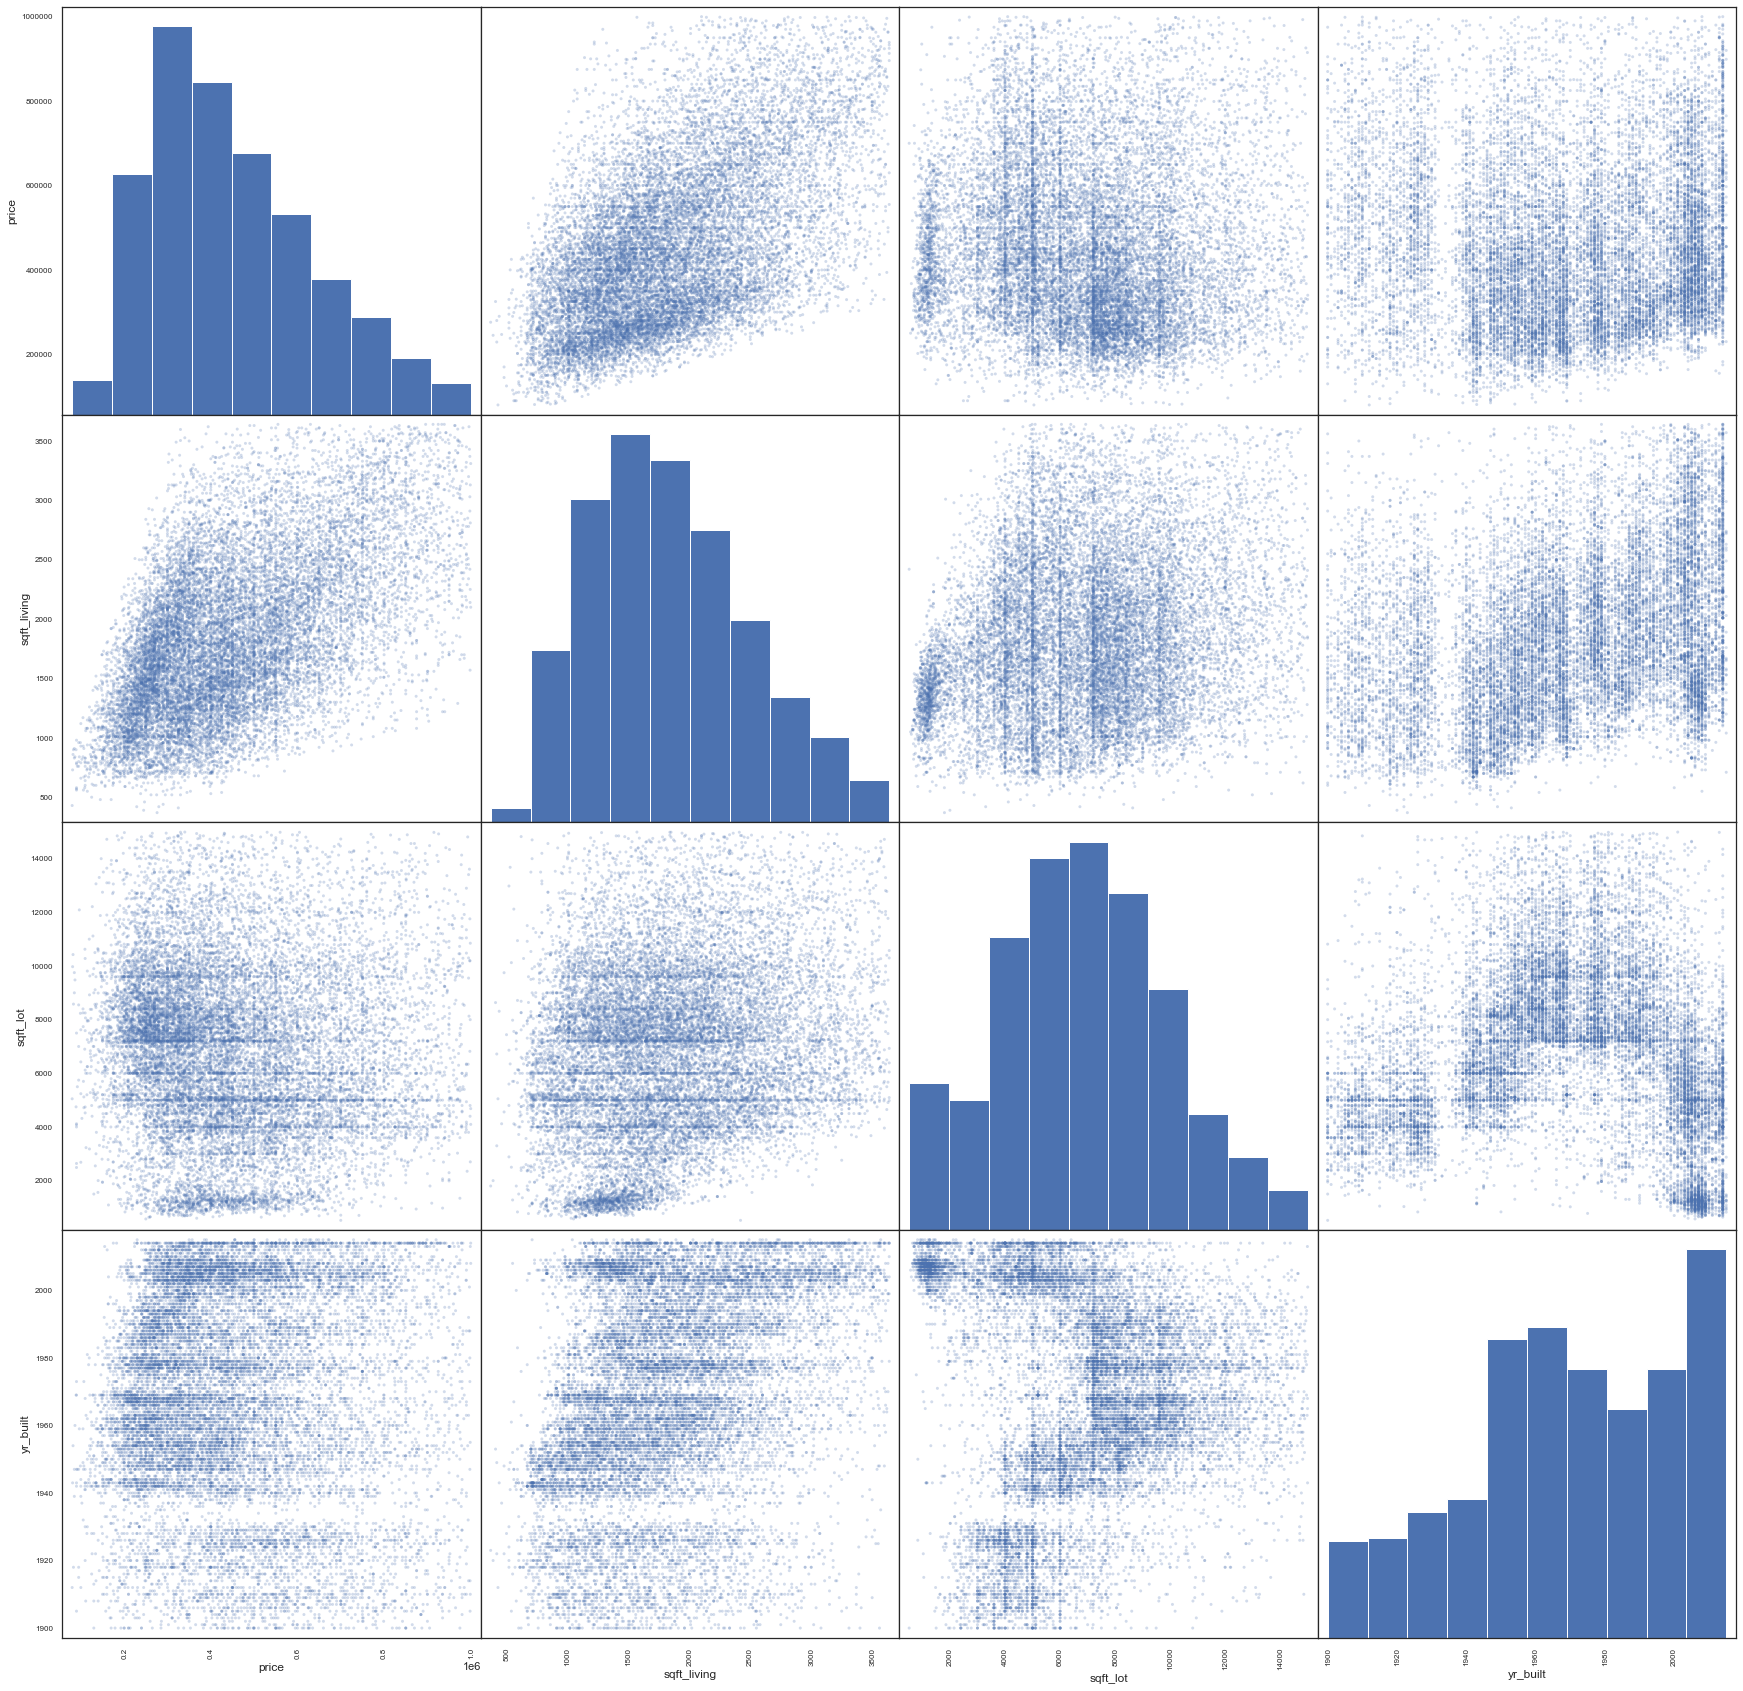

In [79]:
pd.plotting.scatter_matrix(kc_house_small, figsize=(30,30), alpha=.25);

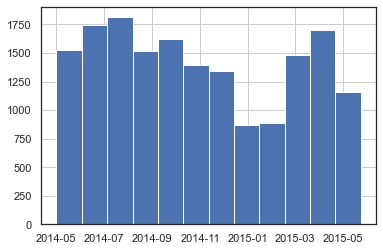

In [80]:
kc_house_small.date.hist(bins=12);

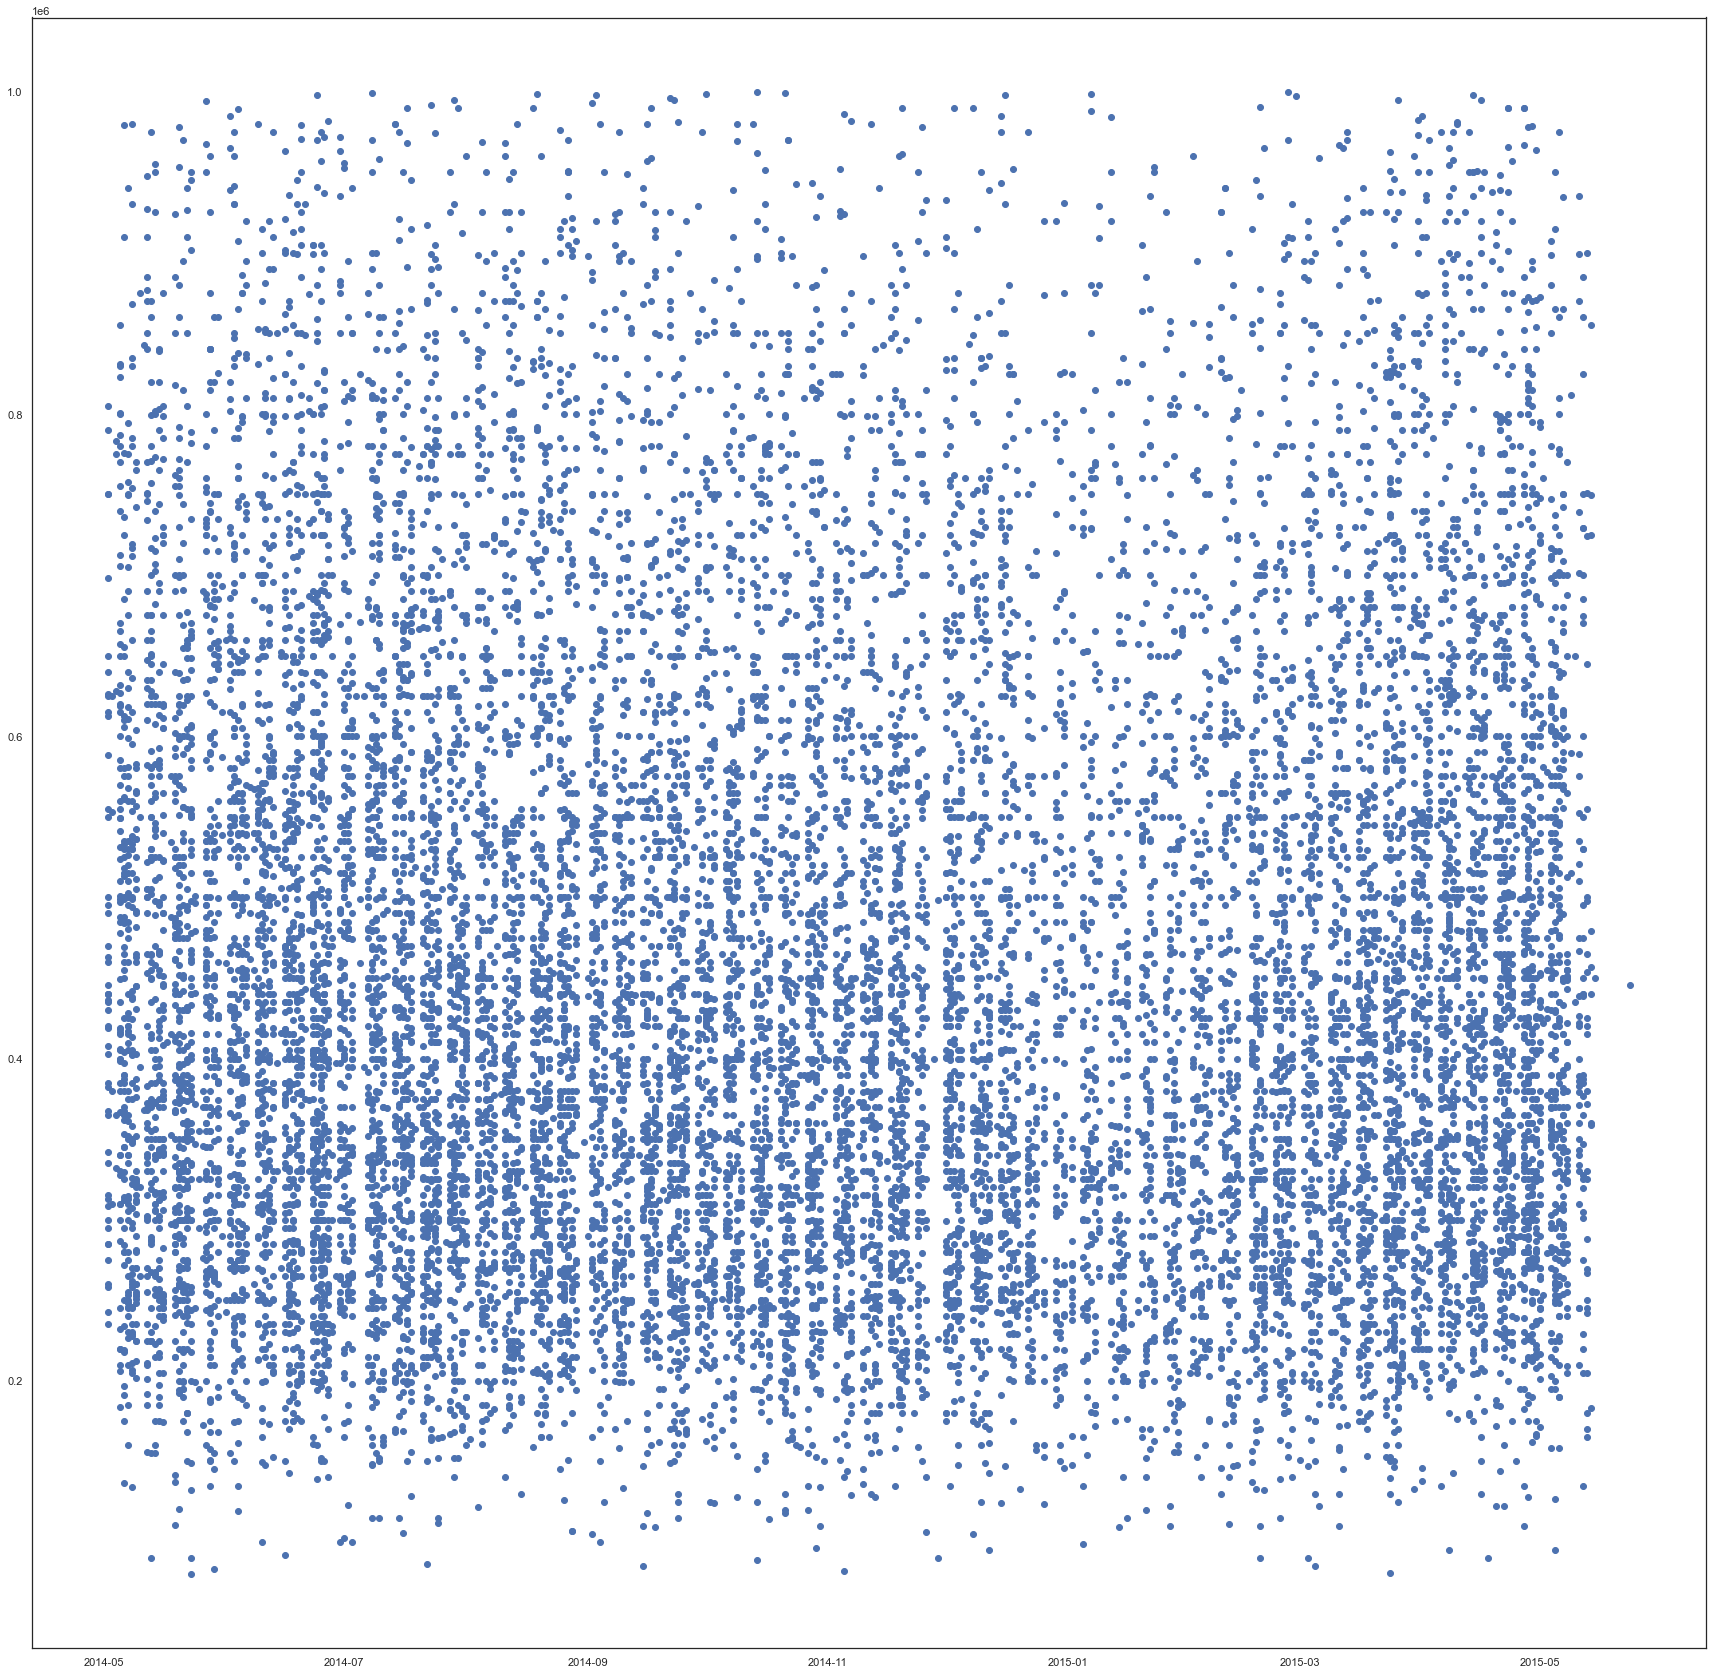

In [81]:
fig, ax = plt.subplots(figsize=(30,30))
ax.scatter(kc_house_small['date'], kc_house_small['price']);

In [82]:
kc_small_may_14 = kc_house_small[(kc_house_small['date'] >= datetime(2014,5,2)) & (kc_house_small['date']<= datetime(2014,6,30))]

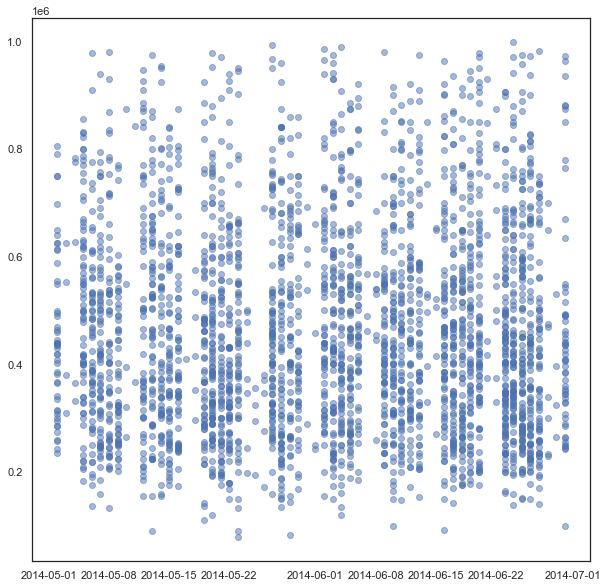

In [83]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(kc_small_may_14['date'], kc_small_may_14['price'], alpha = .5);

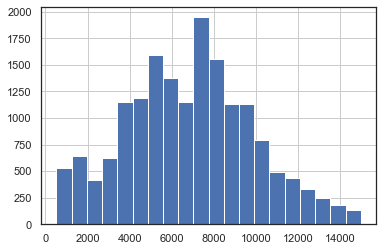

In [84]:
kc_house_small['sqft_lot'].hist(bins=20);

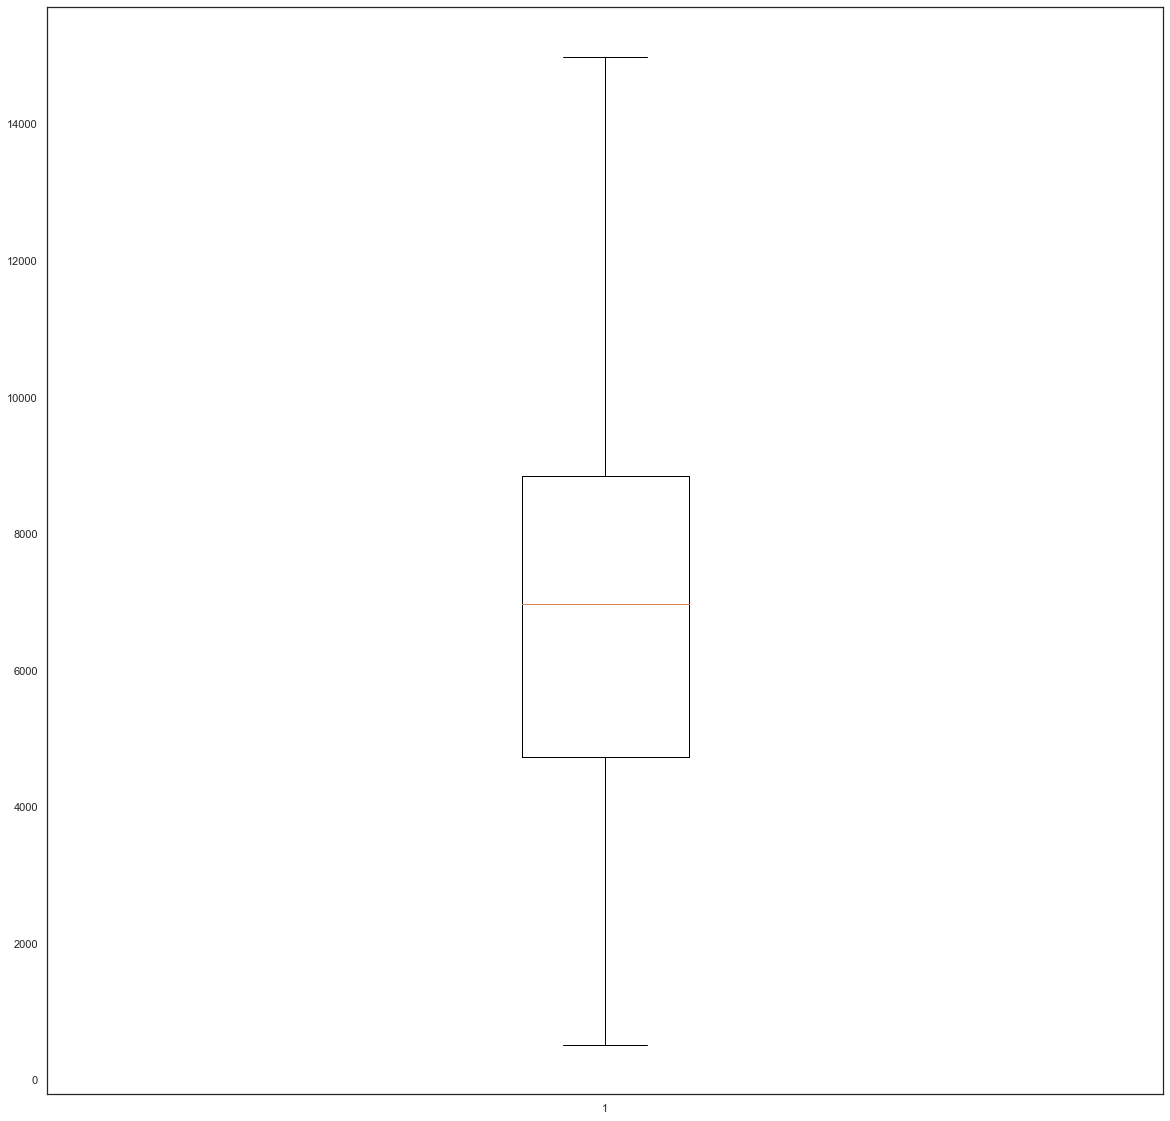

In [85]:
fig, ax = plt.subplots(figsize=(20,20))
ax.boxplot(kc_house_small.sqft_lot, showfliers=True);

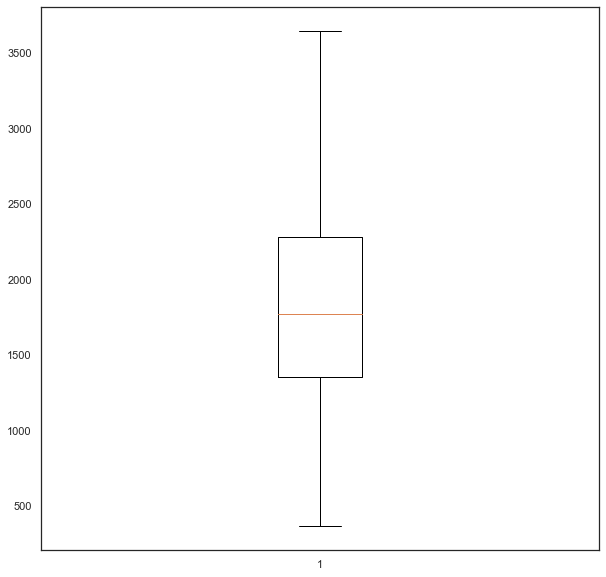

In [86]:
fig, ax = plt.subplots(figsize=(10,10))
ax.boxplot(kc_house_small.sqft_living, showfliers=True);

In [87]:
kc_house_small.corr()

price  sqft_living  sqft_lot  yr_built
price        1.000000     0.551332 -0.055992 -0.007137
sqft_living  0.551332     1.000000  0.201649  0.340982
sqft_lot    -0.055992     0.201649  1.000000 -0.065647
yr_built    -0.007137     0.340982 -0.065647  1.000000

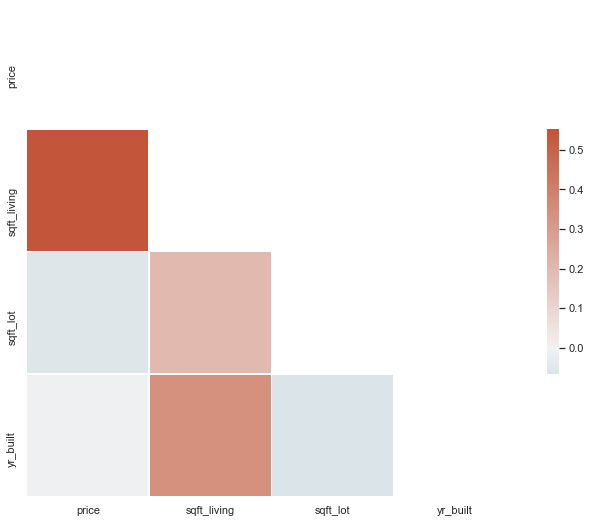

In [88]:
sns.set_theme(style="white")
corr = kc_house_small.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [89]:
kc_regress_df = pd.concat([kc_house_small['price'], kc_house_small['sqft_living'], dummy_data], axis=1)
kc_regress_df

price  sqft_living  bed_2  bed_3  bed_4  bed_5  bed_6  bed_7  \
id                                                                            
7129300520  221900.0         1180      0      1      0      0      0      0   
6414100192  538000.0         2570      0      1      0      0      0      0   
5631500400  180000.0          770      1      0      0      0      0      0   
2487200875  604000.0         1960      0      0      1      0      0      0   
1954400510  510000.0         1680      0      1      0      0      0      0   
...              ...          ...    ...    ...    ...    ...    ...    ...   
263000018   360000.0         1530      0      1      0      0      0      0   
6600060120  400000.0         2310      0      0      1      0      0      0   
1523300141  402101.0         1020      1      0      0      0      0      0   
291310100   400000.0         1600      0      1      0      0      0      0   
1523300157  325000.0         1020      1      0      0      0      0      0   

            bed_8  bed_9  ...  grade_4  grade_5  grade_6  grade_7  grade_8  \
id                        ...                                                
7129300520      0      0  ...        0        0        0        1        0   
6414100192      0      0  ...        0        0        0        1        0   
5631500400      0      0  ...        0        0        1        0        0   
2487200875      0      0  ...        0        0        0        1        0   
1954400510      0      0  ...        0        0        0        0        1   
...           ...    ...  ...      ...      ...      ...      ...      ...   
263000018       0      0  ...        0        0        0        0        1   
6600060120      0      0  ...        0        0        0        0        1   
1523300141      0      0  ...        0        0        0        1        0   
291310100       0      0  ...        0        0        0        0        1   
1523300157      0      0  ...        0        0        0        1        0   

            grade_9  grade_10  grade_11  reno_True  bsmt_True  
id                                                             
7129300520        0         0         0          0          0  
6414100192        0         0         0          1          1  
5631500400        0         0         0          0          0  
2487200875        0         0         0          0          1  
1954400510        0         0         0          0          0  
...             ...       ...       ...        ...        ...  
263000018         0         0         0          0          0  
6600060120        0         0         0          0          0  
1523300141        0         0         0          0          0  
291310100         0         0         0          0          0  
1523300157        0         0         0          0          0  

[17059 rows x 48 columns]

# Starting Regression

In [90]:
X = kc_regress_df.drop('price', axis=1)
x = kc_regress_df.sqft_living
y = kc_regress_df.price
xy_data = kc_regress_df[['price','sqft_living']]

In [91]:
X_train, X_test, y_train, y_test = train_test_split(
                                                X,
                                                y,
                                                test_size=0.2,
                                                random_state=42
)

x_train, x_test, y_train, y_test = train_test_split(
                                                x,
                                                y,
                                                test_size=0.2,
                                                random_state=42
)

In [92]:
sm.formula.ols(formula = "y ~ X", data = kc_regress_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     306.6
Date:                Wed, 21 Apr 2021   Prob (F-statistic):               0.00
Time:                        10:52:43   Log-Likelihood:            -2.2610e+05
No. Observations:               17059   AIC:                         4.523e+05
Df Residuals:                   17011   BIC:                         4.527e+05
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.627e+04   1.59e+05      0.165      0.869   -2.86e+05    3.38e+05
X[0]          96.6737      3.010     32.118      0.000      90.774     102.573
X[1]        2629.3867   1.15e+04      0.229      0.819   -1.99e+04    2.52e+04
X[2]        -3.86e+04   1.15e+04     -3.351      0.001   -6.12e+04    -1.6e+04
X[3]       -4.467e+04   1.18e+04     -3.778      0.000   -6.78e+04   -2.15e+04
X[4]       -5.061e+04   1.27e+04     -3.995      0.000   -7.54e+04   -2.58e+04
X[5]       -3.035e+04   1.66e+04     -1.827      0.068   -6.29e+04    2210.405
X[6]       -4.494e+04   3.61e+04     -1.245      0.213   -1.16e+05    2.58e+04
X[7]        2.414e+04   5.91e+04      0.408      0.683   -9.17e+04     1.4e+05
X[8]        3.962e+05   1.39e+05      2.852      0.004    1.24e+05    6.68e+05
X[9]        3.599e+04   9.87e+04      0.365      0.715   -1.57e+05    2.29e+05
X[10]       -1.25e+05   1.39e+05     -0.899      0.369   -3.97e+05    1.48e+05
X[11]       9.373e+04   7.23e+04      1.297      0.195   -4.79e+04    2.35e+05
X[12]       1.098e+05   6.92e+04      1.585      0.113   -2.59e+04    2.45e+05
X[13]       5.863e+04   8.67e+04      0.676      0.499   -1.11e+05    2.29e+05
X[14]       8.921e+04   6.93e+04      1.287      0.198   -4.67e+04    2.25e+05
X[15]       8.742e+04   6.93e+04      1.262      0.207   -4.84e+04    2.23e+05
X[16]        9.35e+04   6.93e+04      1.349      0.177   -4.24e+04    2.29e+05
X[17]       6.875e+04   6.93e+04      0.992      0.321   -6.72e+04    2.05e+05
X[18]       5.515e+04   6.93e+04      0.796      0.426   -8.07e+04    1.91e+05
X[19]       7.907e+04   6.94e+04      1.139      0.255   -5.71e+04    2.15e+05
X[20]       7.949e+04   6.96e+04      1.143      0.253   -5.68e+04    2.16e+05
X[21]       9.414e+04   6.98e+04      1.348      0.178   -4.27e+04    2.31e+05
X[22]       9.171e+04   6.97e+04      1.315      0.188    -4.5e+04    2.28e+05
X[23]       1.251e+05   7.27e+04      1.722      0.085   -1.73e+04    2.68e+05
X[24]       1.016e+05   7.33e+04      1.386      0.166    -4.2e+04    2.45e+05
X[25]       1.557e+05    9.8e+04      1.589      0.112   -3.64e+04    3.48e+05
X[26]      -6605.3017   7.92e+04     -0.083      0.934   -1.62e+05    1.49e+05
X[27]       1.473e+04   9.94e+04      0.148      0.882    -1.8e+05    2.09e+05
X[28]       2.382e+04    1.2e+05      0.198      0.843   -2.12e+05     2.6e+05
X[29]       7.298e+04   9761.194      7.477      0.000    5.39e+04    9.21e+04
X[30]       7.074e+04   5927.181     11.935      0.000    5.91e+04    8.24e+04
X[31]       6.954e+04   9816.779      7.084      0.000    5.03e+04    8.88e+04
X[32]       1.926e+05   1.63e+04     11.795      0.000    1.61e+05    2.25e+05
X[33]       -1.78e+04   3.34e+04     -0.533      0.594   -8.33e+04    4.77e+04
X[34]       3535.6478   3.12e+04      0.113      0.910   -5.76e+04    6.47e+04
X[

In [93]:
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X_train)

In [94]:
model= LinearRegression()
scores = cross_validate(
                    model, X_train, y_train, cv=5, 
                    return_train_score=True
)
scores

{'fit_time': array([0.03334188, 0.03247404, 0.03376484, 0.0284121 , 0.03407598]),
 'score_time': array([0.00465417, 0.00599289, 0.00418782, 0.00669503, 0.00380206]),
 'test_score': array([0.46870979, 0.43683417, 0.46721977, 0.43074066, 0.44028406]),
 'train_score': array([0.44948525, 0.45813581, 0.45078624, 0.4596796 , 0.45706201])}

In [95]:
np.mean(scores['train_score']), np.std(scores['train_score'])

(0.4550297807412539, 0.004102378765651661)

In [96]:
np.mean(scores['test_score']), np.std(scores['test_score'])

(0.448757690137562, 0.01598449835467439)

In [97]:
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.4545276634012886